# Transient Arctic modeling

## Model configuration - Processes considered

<img src='image/fullxml.png' width='768' height='200' alt='transient configuration' align='center' />

## Column model



|Soil layer                                                        |Peat|Mineral|Bedrock|
|:-----------------------------------------------------------------|:--:|:--:|:-----:|
|Depth from surface                                                         |0.3 m |20 m |40 m  |
|Cell size                                                         |0.01 m |0.01 m |0.01 m  |
|Porosity                                                          |6.3739496E-01 |4.8103077E-01|0.3 |
|Permeability ($\mathrm{m}^2$)                                     |1e-07|1e-08|1e-09|
|Van Genuchten $\alpha$ (Pa$^{-1}$)                                |1.0000000E-02|1.8249144E-03|0.03|
|Van Genuchten n                                                   |2.0500000E+00|2.0500000E+00|2|
|Residual saturation                                               |2.2432414E-01|1.5948806E-01|0.05|
|Thermal conductivity, unfrozen ($\mathrm{Wm}^{-1}\mathrm{K}^{-1}$)|4.3957661E-01|9.5210506E-01|1|
|Thermal conductivity, dry ($\mathrm{Wm}^{-1}\mathrm{K}^{-1}$)     |1.0102341E-01|9.8440543E-01|0.29|



## Model setup – initialization

freeze.xml
* The purpose is to freeze a soil column from bottom to top to obtain an initial frozen soil domain.
* The freeze-up model has the same configuration with demo 1.
* Initial water table depth = -5.78m
* Run for a long time to reach steady state (1000 years)
* Obtain the final pressure and temperature profile using ATS tool **column_data.py**

- <font color='red'>Do we conduct a similar spin-up process?</font>

## Model setup – transient 

* cycle driver
  - Basic configuration
  - Run for 1 year
* subsurface flow
  - Initial condition: hydrostatic head = -1 m (Original - from freezeup)
  - Boundary condition: J$_\mathrm{w}$ = 0 [Neumann boundary - No hydraulic flow at the surfaces - Prep and Evap. is going to be added using SEB]
* surface flow
  - Initial condition: from subsurface
  - Boundary condition: outlet at surface; (if hillslope, would be possible define the lower side as outlet)
* subsurface energy
  - Initial condition: T = 270.15 K
  - Boundary condition: J$_\mathrm{e}$ = 0
* surface energy
  - Initial condition: from subsurface
  - Boundary condition: J$_\mathrm{e}$ = 0
* SEB
  - Initial condition: snow depth, could be from the last step of spinup (We need to rethink this value - Can we assign the value from Yakou data?

## SEB conditions 

- **SEB with Snow considered - Daily data considered**
- Surface-air_temperature 
- Surface-incoming_shortwave_radiation 
- Surface-relative_humidity 
- Surface precipitation_rain
- Surface-snow-precipitation: This data needs to be rethought - As it is taking greater simulation time. Actual data, constant data (from 50 - 200 days),... have been tried.  

- Land cover types (Rethink the values - Is it fix?): Dessicated zone thickness (m) = 0.1 m, Roughness length of bare ground (m) = 0.04, Roughness length of snow (m) = 0.004, Snow transition depth (m) = 0.02, Water transition depth (m) = 0.001, albedo of bare ground (-) = 0.135, Emissivity of bare ground (-) = 0.92.

- Do we need to define minimum wind speed? - Check out: https://amanzi.github.io/ats/input_spec/ATSNativeSpec_1_1.html#id168

## Observation

We add **observation** in this model input file.
It is used for collecting some specific modeled results (variables/parameters) 
probably at some specific locations with time. Locations are defined in **region**.  

* Observations points considered: 0.01, 0.04, 0.2, 0.4, 0.8, 1.2, 6, 5.0, 10.0, 20.0, 30.0, 40.0 m & surface outlet (Region: boundary - It includes all the entities on the boundary face! - How is it defined?).

# Model observation

In [1]:
%matplotlib inline
import sys, os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
sys.path.append('py_script')
import obsRead
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime
import matplotlib.image as mpimg

In [3]:
import os
os.getcwd()

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case5_B'

In [4]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colors
import matplotlib.cm
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [5]:
#### Extracting the measured data
Yakou_measured_data = pd.read_csv('Yakou_data_processed_2017.csv', sep=',',index_col='TIMESTAMP')
Yakou_measured_data.head()

,Wind speed at 10 m (m/s),Wind direction at 10 m (°),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Precipitation at 10 m (mm),Air pressure (hPa),Infrared temperature (°C),Infrared temperature (°C).1,PAR_down,PAR_up,...,Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C),Soil temperature at - 0.04 m (K),Soil temperature at - 0.2 m (K),Soil temperature at - 0.4 m (K),Soil temperature at - 0.8 m (K),Soil temperature at - 1.2 m (K),Soil temperature at - 1.6 m (K)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-01-01,5.703646,240.315972,-11.643319,26.417292,0.0,609.727778,-13.595701,-13.473771,23.526389,3.303062,...,-9.902153,-8.312083,-5.657743,-4.284076,261.023264,262.172222,263.247847,264.837917,267.492257,268.865924
2017-01-02,4.522028,215.252083,-12.547639,25.603264,0.0,611.459722,-14.148368,-14.069958,23.598458,3.026146,...,-9.815208,-8.296667,-5.790653,-4.451597,261.006667,262.246458,263.334792,264.853333,267.359347,268.698403
2017-01-03,5.572090,211.012500,-12.374722,43.428264,0.0,609.315278,-14.089813,-14.027125,18.449590,2.359194,...,-9.805000,-8.309931,-5.898486,-4.594007,260.854861,262.184583,263.345000,264.840069,267.251514,268.555993
2017-01-04,6.037000,242.357639,-10.819882,30.436111,0.0,608.171528,-13.654188,-13.519576,24.310958,4.106097,...,-9.844306,-8.356181,-5.995306,-4.716979,261.032708,262.226806,263.305694,264.793819,267.154694,268.433021
2017-01-05,5.978368,196.270833,-10.152083,22.180000,0.0,607.352778,-13.348424,-13.196604,24.258903,2.973646,...,-9.785764,-8.384167,-6.089104,-4.832729,261.347014,262.409792,263.364236,264.765833,267.060896,268.317271


In [6]:
depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3

poro_peat = 6.3739496E-01

poro_mineral = 4.8103077E-01

for i, depth in enumerate(depths):
    if depth < depth_peat:
        Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    else:
        Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)


### Input data (Example) -

In [7]:
with h5py.File(f'data_input/barrow_71p3225_-156p6231_2011_2020_smooth.h5','r') as hdf:
    ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
    #air_temperature = np.array(hdf.get('air temperature [K]'))
    #print(air_temperature)
    z = np.arange(0,3650)
    data_input = pd.DataFrame(index=z)
    
    #print(data_input)
    for i in ls:
        #print(i)
        data_input[f'{i}'] = np.array(hdf.get(f'{i}'))
        

data_input.head()

,air temperature [K],incoming shortwave radiation [W m^-2],precipitation rain [m s^-1],precipitation snow [m SWE s^-1],relative humidity [-],time [s],wind speed [m s^-1]
0,251.684990,-0.000462,0.0,5.183254e-09,0.737009,0.0,0.5
1,251.609491,-0.001000,0.0,5.183254e-09,0.737289,86400.0,0.5
2,251.509162,-0.001818,0.0,5.183254e-09,0.738945,172800.0,0.5
3,251.447679,-0.002735,0.0,5.183254e-09,0.739645,259200.0,0.5
4,251.441191,-0.004119,0.0,5.183254e-09,0.739195,345600.0,0.5


In [8]:
with h5py.File(f'data_input/Yakou_data_subtemp0cm_2017.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    #print('\n')


List of datasets in this file: 
 
 ['Incoming longwave radiation (W', 'Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.00 m (K)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation rain [mols m^-2 s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']


In [9]:
data_input.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649],
           dtype='int64', length=3650)

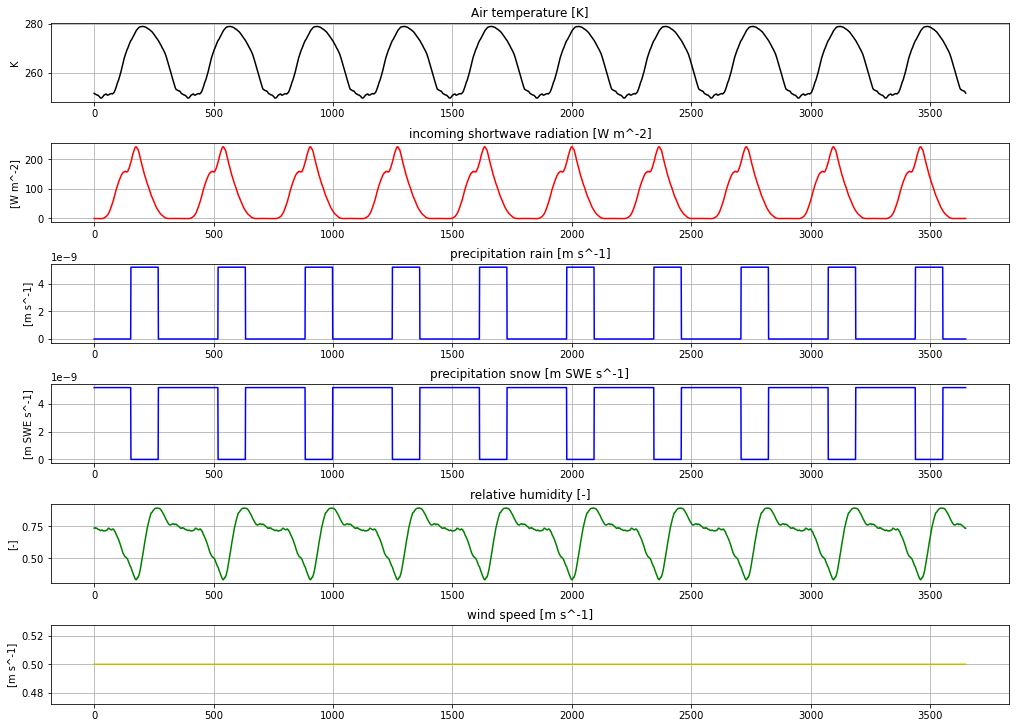

In [10]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Air temperature [K]')
f2_ax1.plot(data_input['air temperature [K]'],'k', label='Air temperature [K]')
f2_ax1.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('incoming shortwave radiation [W m^-2]')
f2_ax2.plot(data_input['incoming shortwave radiation [W m^-2]'],'r', label='incoming shortwave radiation [W m^-2]')
f2_ax2.set_ylabel('[W m^-2]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_input['precipitation rain [m s^-1]'],'b', label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('[m s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax3.grid(True)

f2_ax4.set_title('precipitation snow [m SWE s^-1]')
f2_ax4.plot(data_input['precipitation snow [m SWE s^-1]'],'b', label='precipitation snow [m SWE s^-1]')
f2_ax4.set_ylabel('[m SWE s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax4.grid(True)

f2_ax5.set_title('relative humidity [-]')
f2_ax5.plot(data_input['relative humidity [-]'],'g', label='relative humidity [-]')
f2_ax5.set_ylabel('[-]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax5.grid(True)

f2_ax6.set_title('wind speed [m s^-1]')
f2_ax6.plot(data_input['wind speed [m s^-1]'],'y', label='wind speed [m s^-1]')
f2_ax6.set_ylabel('[m s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax6.grid(True)

### Our data

In [11]:
z = np.arange(0,365)
len(z)

365

In [32]:
with h5py.File(f'data_input/Yakou_data_subtemp0cm_2017.h5','r') as hdf:
    ls = list(hdf.keys())
    print(ls)
    air_temp_smoothened = np.array(hdf.get('air temperature [K]'))
    incoming_SW = np.array(hdf.get('Incoming shortwave radiation (W/m^2)'))
    rel_humid = np.array(hdf.get('Relative humidity at 5 m (%)'))
    wind_speed_10m = np.array(hdf.get('Wind speed at 10 m (m/s)'))
    prep = np.array(hdf.get('precipitation rain [m s^-1]'))
    snow = np.array(hdf.get('precipitation snow [m SWE s^-1]'))
    time = np.array(hdf.get('time [s]'))
    soil_temp = np.array(hdf.get('Soil temperature at - 0.00 m (K)'))
    #print(air_temp_smoothened)
    #z = np.arange(0,365)
    #data_input_rk = pd.DataFrame()
    
    #print(data_input)
    #for i in ls:
        #print(i)
        #data_input_rk[f'{i}'] = np.array(hdf.get(f'{i}'))
        
#data_input['time [days]'] = data_input['time [s]']/86400        
#data_input.index = data_input['time [days]']

#data_input['Air temperature [°C]'] = data_input['air temperature [K]'] - 273.15
#data_input_rk.head()

['Incoming longwave radiation (W', 'Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.00 m (K)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation rain [mols m^-2 s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']


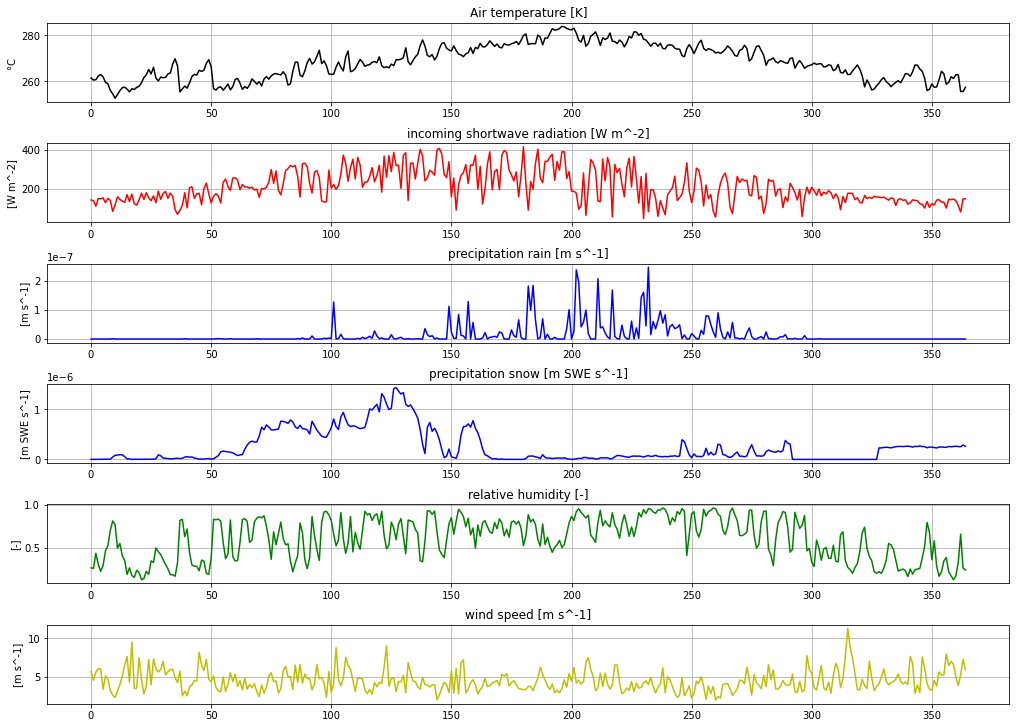

In [35]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Air temperature [K]')
f2_ax1.plot(air_temp_smoothened,'k', label='Air temperature [K]')
f2_ax1.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('incoming shortwave radiation [W m^-2]')
f2_ax2.plot(incoming_SW,'r', label='incoming shortwave radiation [W m^-2]')
f2_ax2.set_ylabel('[W m^-2]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(prep,'b', label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('[m s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax3.grid(True)

f2_ax4.set_title('precipitation snow [m SWE s^-1]')
f2_ax4.plot(snow,'b', label='precipitation snow [m SWE s^-1]')
f2_ax4.set_ylabel('[m SWE s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax4.grid(True)

f2_ax5.set_title('relative humidity [-]')
f2_ax5.plot(rel_humid,'g', label='relative humidity [-]')
f2_ax5.set_ylabel('[-]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax5.grid(True)

f2_ax6.set_title('wind speed [m s^-1]')
f2_ax6.plot(wind_speed_10m,'y', label='wind speed [m s^-1]')
f2_ax6.set_ylabel('[m s^-1]')
#f2_ax2.set_xlabel('Date')
#f2_ax2.legend()
f2_ax6.grid(True)

## Solutions

In [23]:
def modeled(directory):
    obs_dir = os.path.join(directory, 'observation.dat')
    skiprows, header = obsRead.read_file(obs_dir)
    obs_data = np.loadtxt(obs_dir, delimiter=' ', skiprows=skiprows)
        
    time = np.arange(0,366)
    
    wc_surf,evaporation,thaw_depth,\
    T_surf,T_subp10,T_subp40,T_subp120,\
    sl_subp1,sl_subp3,sl_subp5,sl_subp10,\
    si_subp1,si_subp3,si_subp5,si_subp10\
    = (np.zeros((1,len(time))) for i in range(15))

    wc_surf     = obs_data[:,header.index('surface water content [mol]')]/55500*1000
    evaporation = obs_data[:,header.index('evaporation rate [m s^-1]')]*86400*1000
    thaw_depth  = obs_data[:,header.index('thaw depth [m]')]*100
        
    T_surf    = obs_data[:,header.index('surface temperature [K]')]
    T_subp10  = obs_data[:,header.index('point -0.1 temperature [K]')]
    T_subp40  = obs_data[:,header.index('point -0.4 temperature [K]')]
    T_subp120 = obs_data[:,header.index('point -1.2 temperature [K]')]
    
    sl_subp1  = obs_data[:,header.index('point -0.1 saturation liquid')]
    sl_subp3  = obs_data[:,header.index('point -0.4 saturation liquid')]
    sl_subp5  = obs_data[:,header.index('point -1.2 saturation liquid')]
    sl_subp10 = obs_data[:,header.index('point -1.6 saturation liquid')]
       
    si_subp1  = obs_data[:,header.index('point -0.1 saturation ice')]
    si_subp3  = obs_data[:,header.index('point -0.4 saturation ice')]
    si_subp5  = obs_data[:,header.index('point -0.8 saturation ice')]
    si_subp10 = obs_data[:,header.index('point -1.2 saturation ice')]
        
    # simulated results set
    simset = {}
    simset['surface water content (1e-3 m3)'] = wc_surf
    simset['evaporation (mm/d)']    = evaporation
    simset['thaw depth (cm)']       = thaw_depth
    simset['temperature (K)']       = [T_surf,T_subp10,T_subp40,T_subp120]
    simset['saturation liquid']     = [sl_subp1,sl_subp3,sl_subp5,sl_subp10]
    simset['saturation ice']        = [si_subp1,si_subp3,si_subp5,si_subp10]

    return simset

In [24]:
simset = modeled(directory)

In [25]:
def plot(simset,var,axs,label,fontsize=12):
    rcParams['xtick.labelsize'] = fontsize
    rcParams['ytick.labelsize'] = fontsize
    rcParams['axes.labelsize'] = fontsize
    
    time = np.arange(0,95)
    
    if type(simset[var]) is not list:
        axs.plot( simset[var],'k*')
    
    else:
        cmap = plt.get_cmap('viridis')
        colors = cmap(np.linspace(0,1,len(simset[var])))
        for i in range(4):
            axs.plot( simset[var][i],color=colors[i],label=label[i])
        axs.legend()
    
    axs.set_xticks(range(0,95,90))
    axs.set_xlabel('Time (day)',fontsize=fontsize)
    axs.set_ylabel(var.capitalize(),fontsize=fontsize)

### Checking out the results : Case5_III.demo

In [26]:
directory = 'Case5_III.demo'

In [27]:
obs = pd.read_csv(f'{directory}/observation.dat',skiprows=274,sep=' ')
obs.index

RangeIndex(start=0, stop=219, step=1)

In [26]:
df_observation = obs.copy()

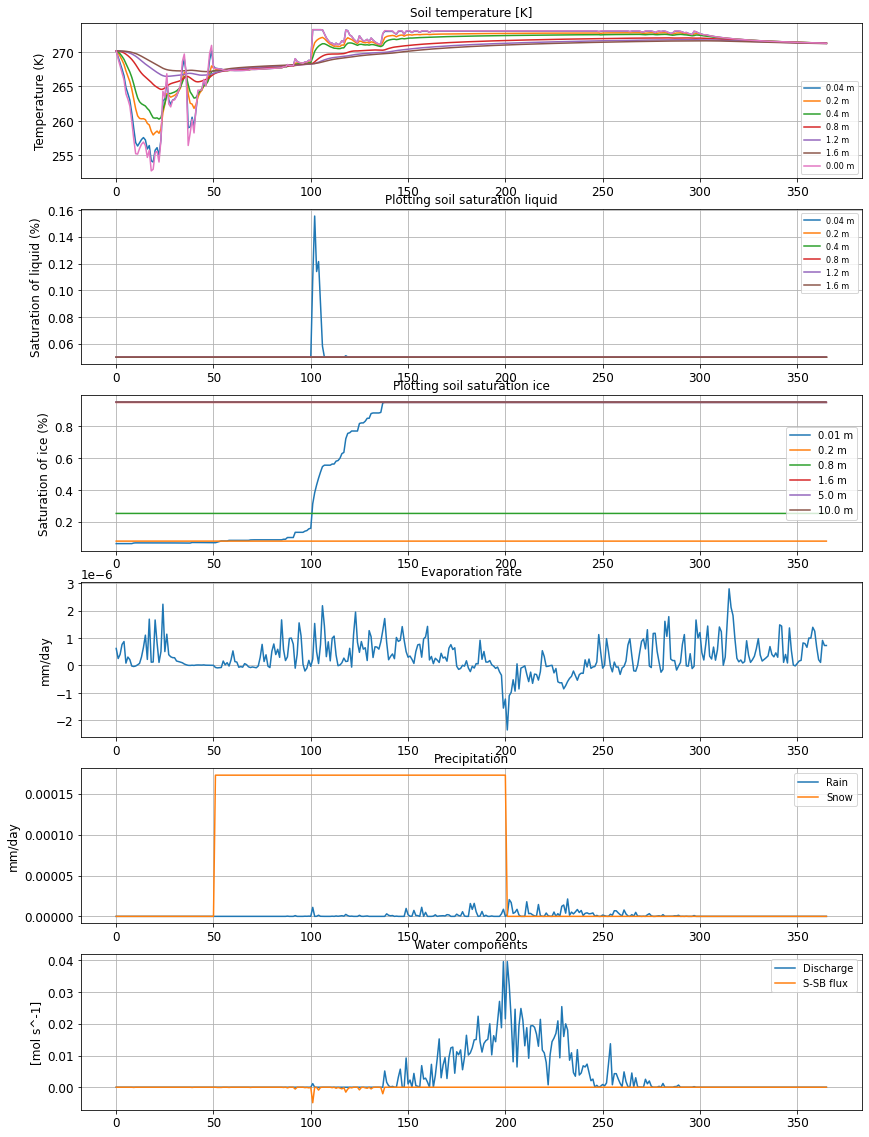

In [27]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Evaporation rate')
ax4.plot(df_observation['evaporation rate [m s^-1]']*86400/1000,label='Evaporation (mm/day)')
ax4.set_ylabel('mm/day')
ax4.grid(True)

ax5.set_title('Precipitation')
ax5.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax5.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax5.set_ylabel('mm/day')
ax5.legend()
ax5.grid(True)

ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

## Solutions

In [28]:
simset = modeled(directory)

## Plot solutions

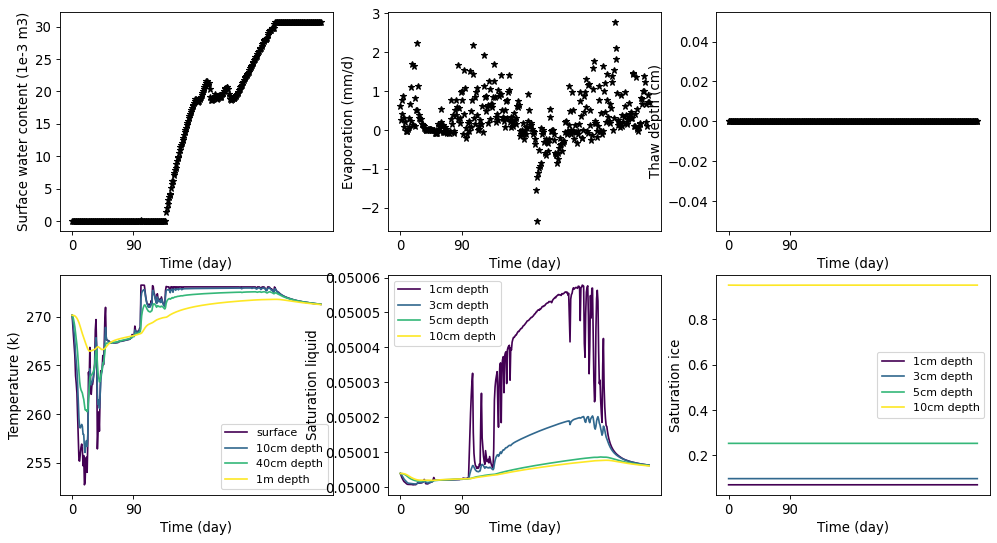

In [29]:
nrows, ncols = 2,3
figl, figw = 15,8
fig, axs = plt.subplots(nrows,ncols,figsize=(figl,figw),dpi=80)
keys = list(simset.keys())
for i in range(ncols):
    plot(simset,keys[i],axs[0][i],label=None)

labels = [['surface','10cm depth','40cm depth','1m depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth']]

for i in range(ncols):
    plot(simset,keys[i+3],axs[1][i],labels[i])

plt.subplots_adjust(wspace=0.2,hspace=0.2)

Text(0.5, 0, 'Days')

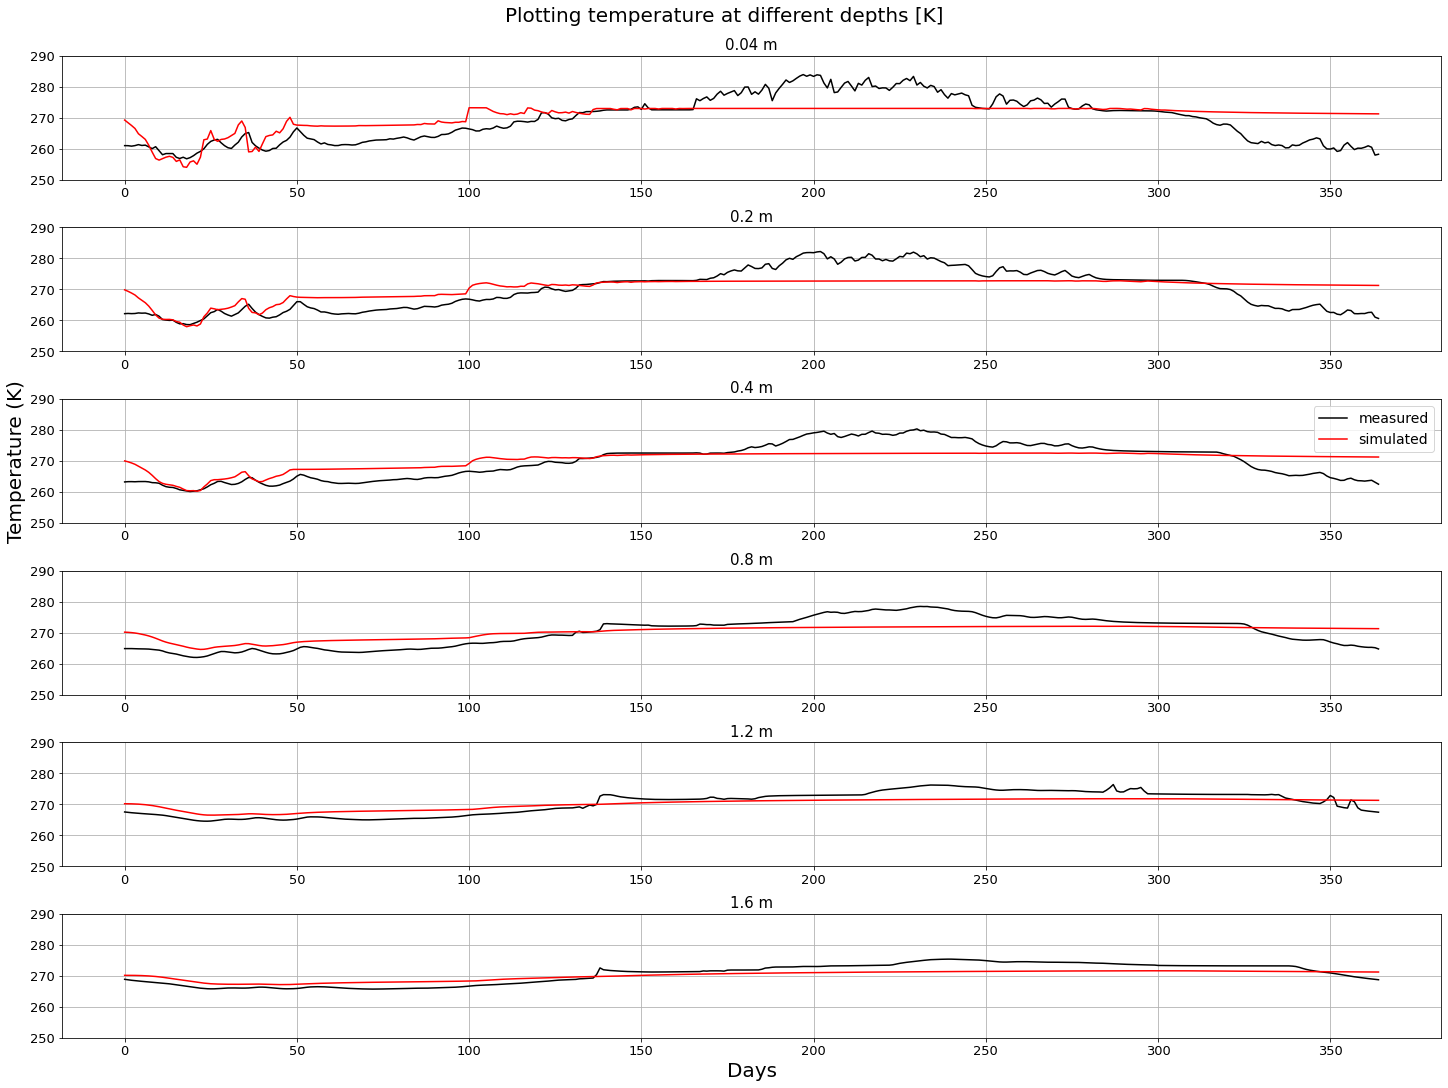

In [31]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,365)
time_period = np.arange(0,365)
x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, df_observation[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

In [35]:
df_observation.index

RangeIndex(start=0, stop=366, step=1)

Text(0.5, 0, 'Days')

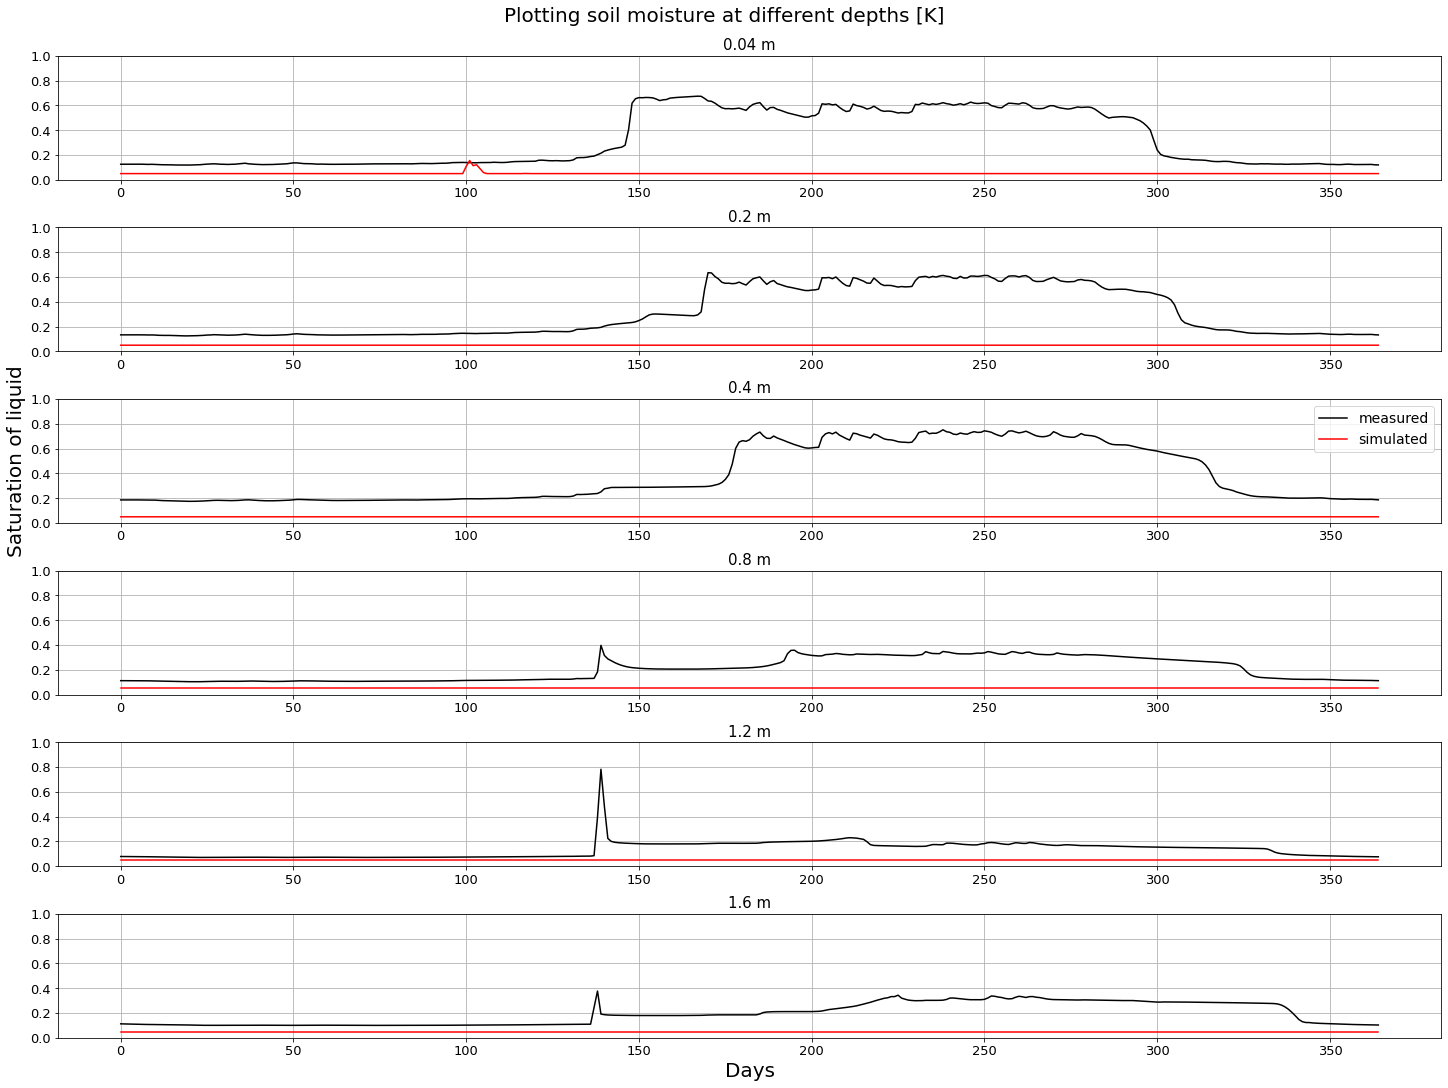

In [36]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period_1 = np.arange(0,365)
time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period_1, df_observation[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Checking out the results : Case5_III1.demo

In [37]:
directory = 'Case5_III1.demo'

In [38]:
obs = pd.read_csv(f'{directory}/observation.dat',skiprows=274,sep=' ')
obs.index

RangeIndex(start=0, stop=366, step=1)

In [39]:
df_observation = obs.copy()

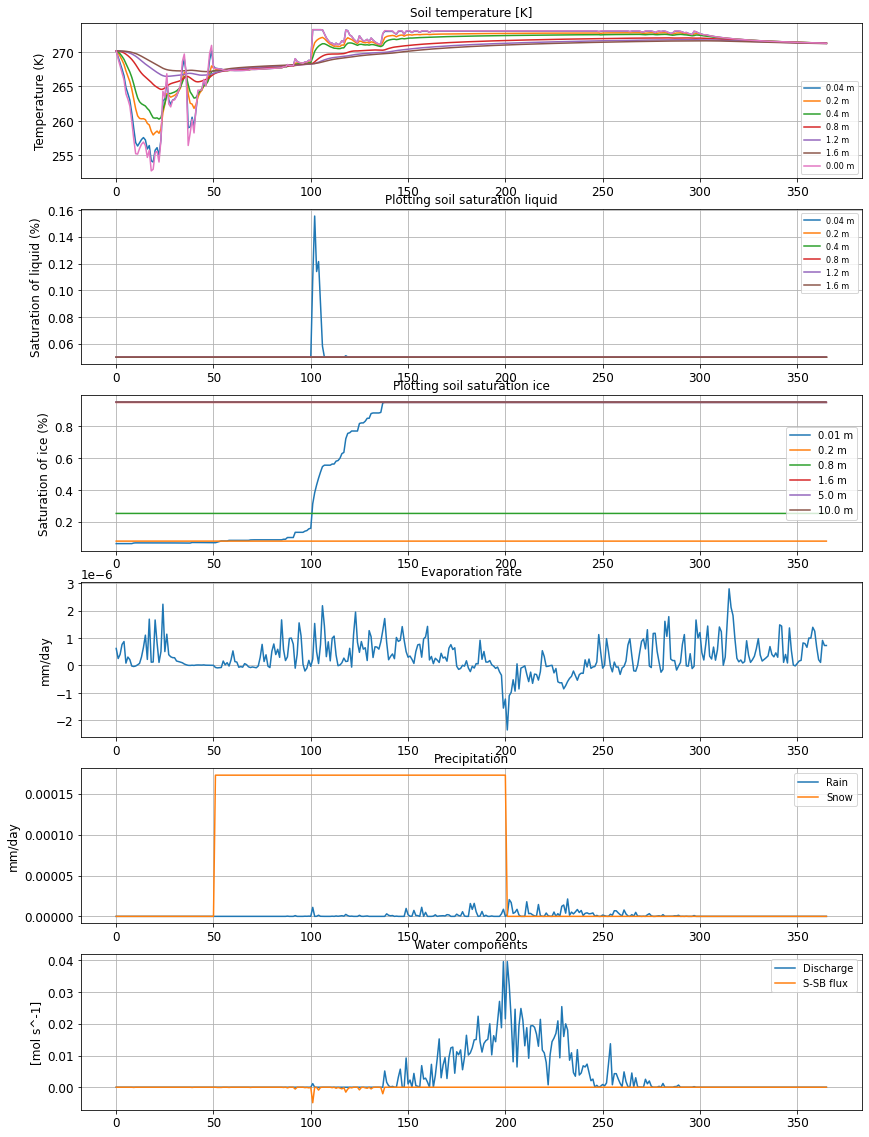

In [40]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Evaporation rate')
ax4.plot(df_observation['evaporation rate [m s^-1]']*86400/1000,label='Evaporation (mm/day)')
ax4.set_ylabel('mm/day')
ax4.grid(True)

ax5.set_title('Precipitation')
ax5.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax5.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax5.set_ylabel('mm/day')
ax5.legend()
ax5.grid(True)

ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

## Solutions

In [41]:
simset = modeled(directory)

## Plot solutions

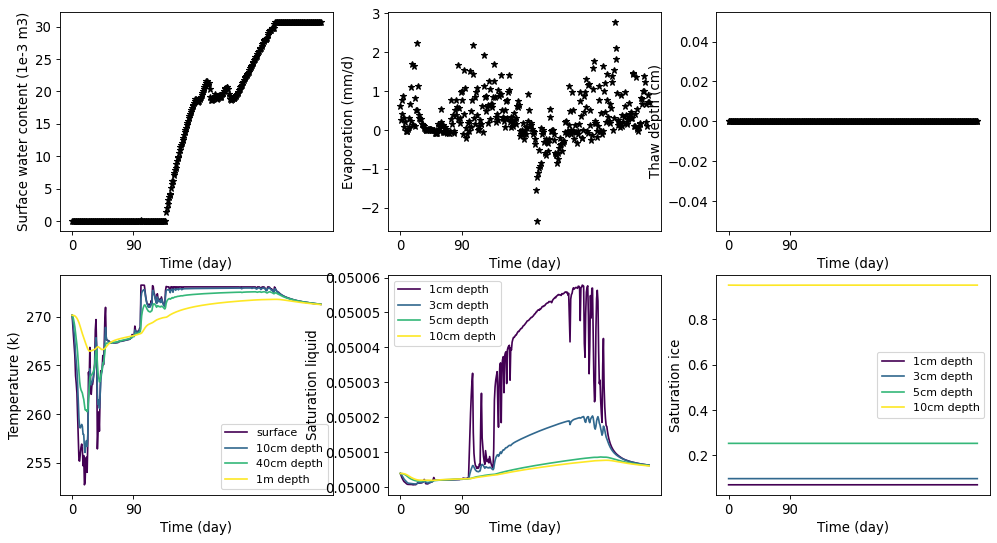

In [42]:
nrows, ncols = 2,3
figl, figw = 15,8
fig, axs = plt.subplots(nrows,ncols,figsize=(figl,figw),dpi=80)
keys = list(simset.keys())
for i in range(ncols):
    plot(simset,keys[i],axs[0][i],label=None)

labels = [['surface','10cm depth','40cm depth','1m depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth']]

for i in range(ncols):
    plot(simset,keys[i+3],axs[1][i],labels[i])

plt.subplots_adjust(wspace=0.2,hspace=0.2)

Text(0.5, 0, 'Days')

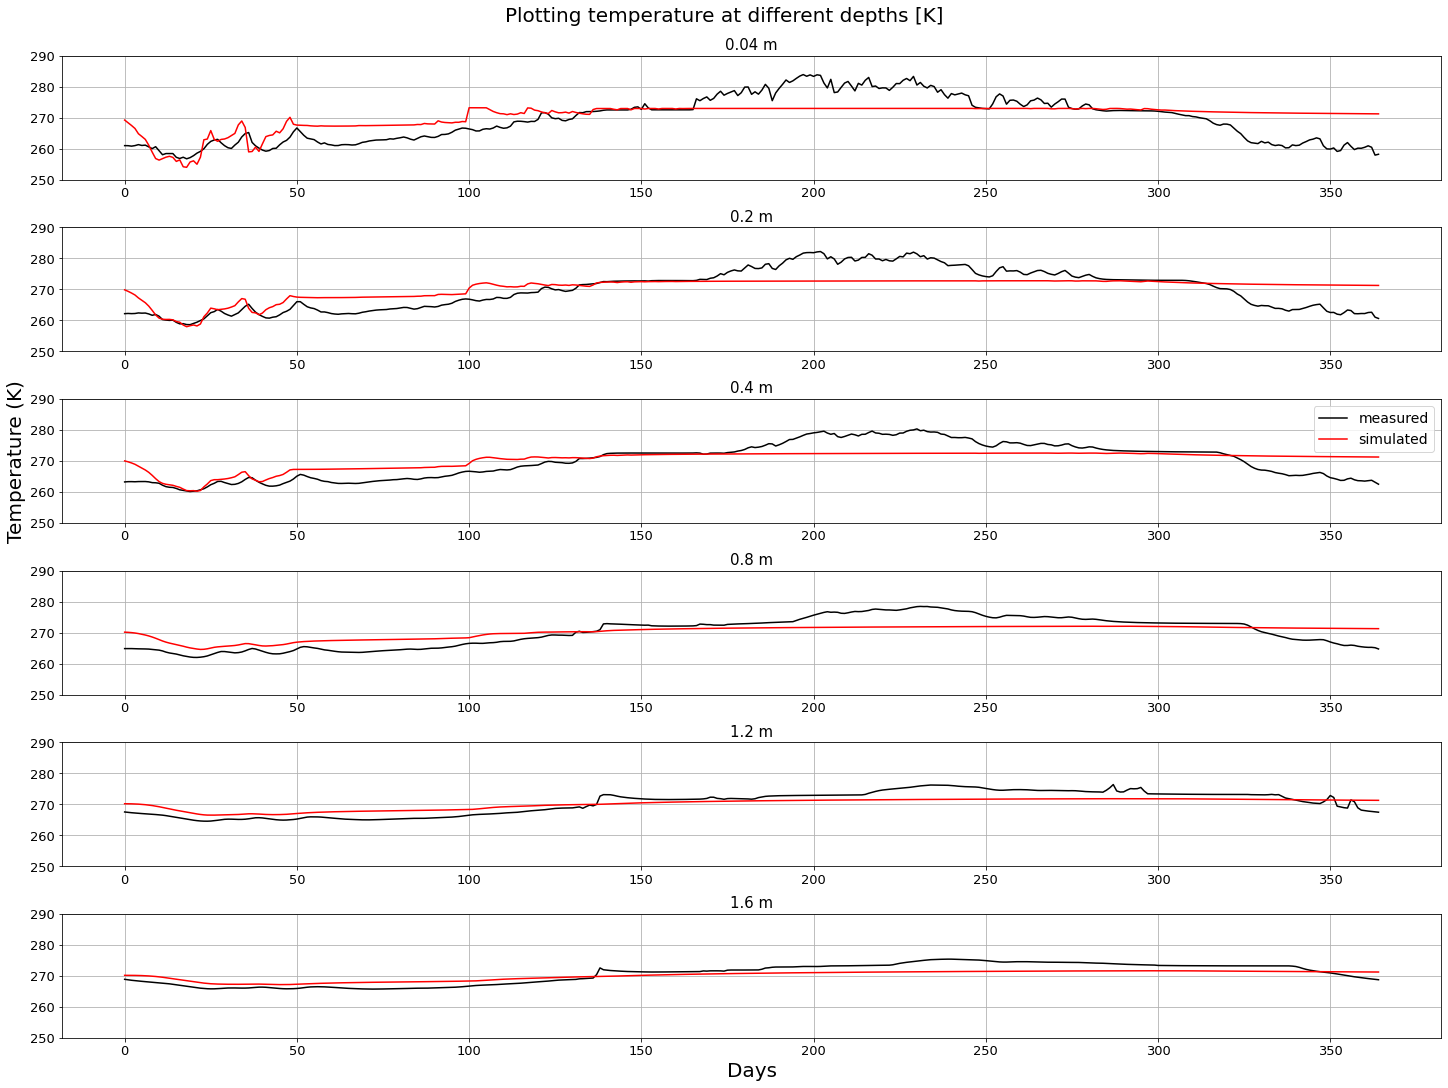

In [43]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
* Temperature estimates have improved on changing the top B.C as Temp. at 0.0 m


Text(0.5, 0, 'Days')

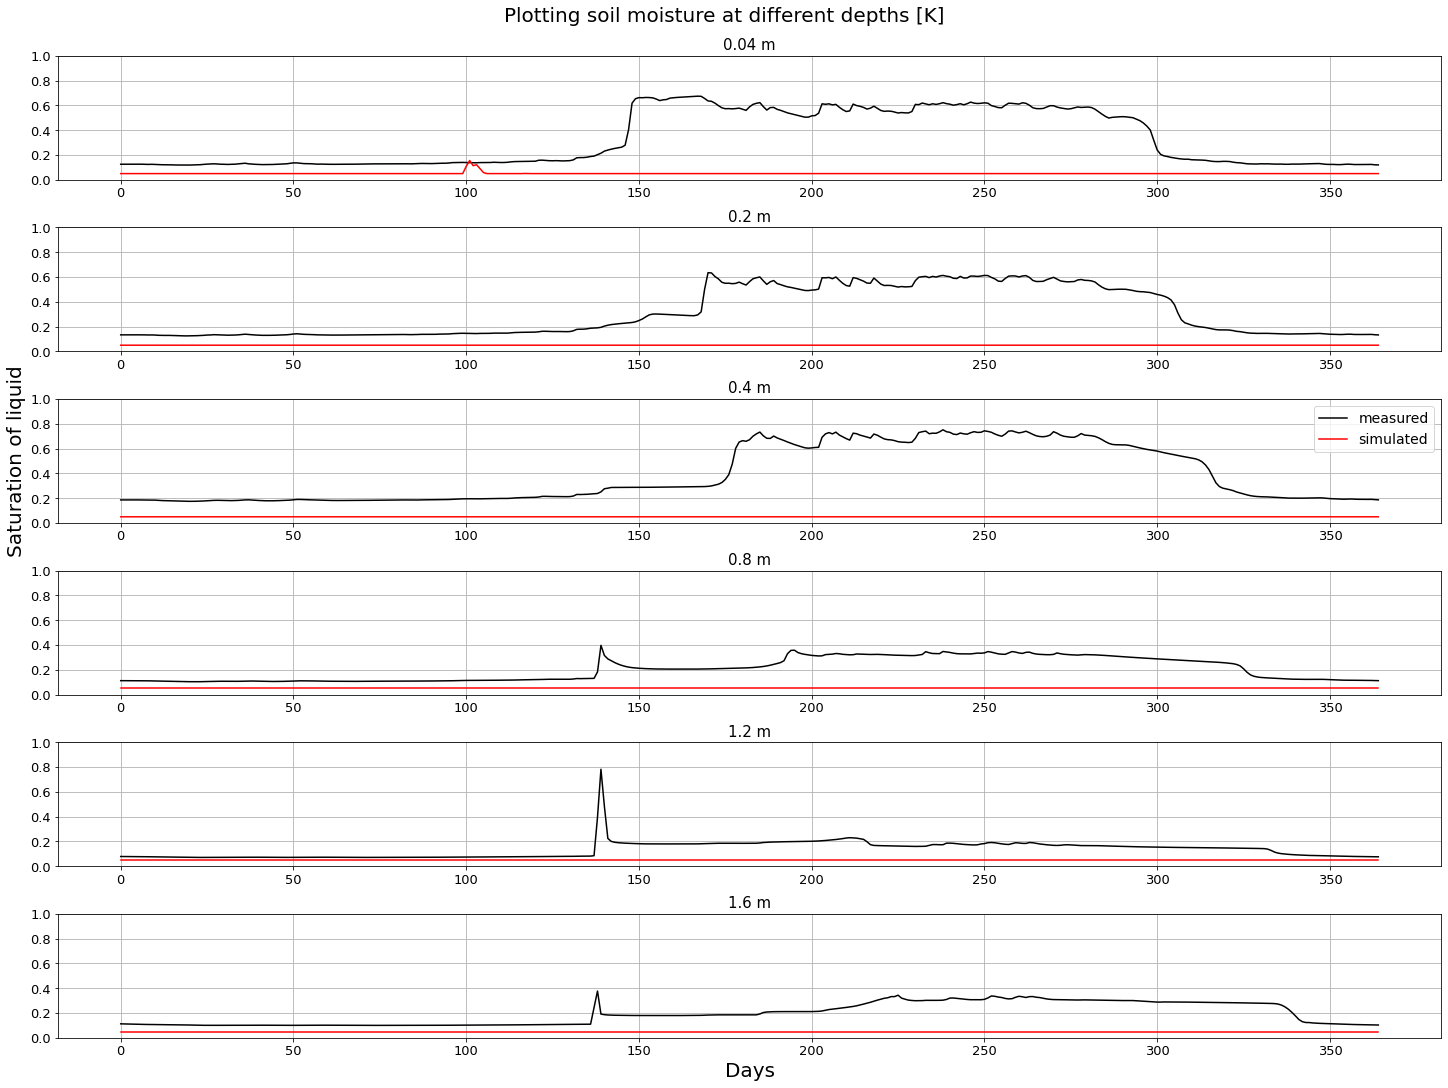

In [44]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

In [45]:
directory

'Case5_III1.demo'

### Extracting the ats output data:

In [46]:
with h5py.File(f'{directory}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
    #air_temperature = np.array(hdf.get('air temperature [K]'))
    #print(air_temperature)
    z = np.arange(0,37)
    ats_output = pd.DataFrame(index=z)
    
    #print(data_input)
    for i in ls:
        #print(i)
        ats_output[f'{i}'] = np.array(hdf.get(f'{i}'))
        

ats_output.head()

,base_porosity.cell.0,capillary_pressure_gas_liq.cell.0,capillary_pressure_liq_ice.cell.0,cell_volume.cell.0,darcy_velocity.cell.0,darcy_velocity.cell.1,darcy_velocity.cell.2,density_rock.cell.0,dwater_content|dtemperature.cell.0,energy.cell.0,...,relative_permeability.cell.0,saturation_gas.cell.0,saturation_ice.cell.0,saturation_liquid.cell.0,temperature.cell.0,thermal_conductivity.cell.0,total_energy_source.cell.0,viscosity_liquid.cell.0,water_content.cell.0,water_source.cell.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
2,11105,11105,11105,11105,11105,11105,11105,11105,11105,11105,...,11105,11105,11105,11105,11105,11105,11105,11105,11105,11105
3,112,112,112,112,112,112,112,112,112,112,...,112,112,112,112,112,112,112,112,112,112
4,11641,11641,11641,11641,11641,11641,11641,11641,11641,11641,...,11641,11641,11641,11641,11641,11641,11641,11641,11641,11641


In [47]:
with h5py.File(f'{directory}/ats_vis_snow_data.h5','r') as hdf:
    ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
    #air_temperature = np.array(hdf.get('air temperature [K]'))
    #print(air_temperature)
    z = np.arange(0,37)
    snow_output = pd.DataFrame(index=z)
    
    #print(data_input)
    for i in ls:
        #print(i)
        snow_output[f'{i}'] = np.array(hdf.get(f'{i}'))
        

snow_output.head()

,snow-age.cell.0,snow-cell_volume.cell.0,snow-death_rate.cell.0,snow-density.cell.0,snow-depth.cell.0,snow-melt.cell.0,snow-precipitation.cell.0,snow-source.cell.0,snow-source_sink.cell.0,snow-temperature.cell.0,snow-water_equivalent.cell.0
0,0,0,0,0,0,0,0,0,0,0,0
1,102,102,102,102,102,102,102,102,102,102,102
2,11105,11105,11105,11105,11105,11105,11105,11105,11105,11105,11105
3,112,112,112,112,112,112,112,112,112,112,112
4,11641,11641,11641,11641,11641,11641,11641,11641,11641,11641,11641


In [48]:
directory

'Case5_III1.demo'

In [49]:
with h5py.File(f'{directory}/ats_vis_surface_data.h5','r') as hdf:
    ls = list(hdf.keys())
    #print('List of datasets in this file: \n \n', ls)
    #print('\n')
    #air_temperature = np.array(hdf.get('air temperature [K]'))
    #print(air_temperature)
    z = np.arange(0,37)
    surface_output = pd.DataFrame(index=z)
    
    #print(data_input)
    for i in ls:
        #print(i)
        surface_output[f'{i}'] = np.array(hdf.get(f'{i}'))
        

surface_output.head()

,surface-air_temperature.cell.0,surface-albedo.cell.0,surface-albedos.cell.0,surface-albedos.cell.1,surface-albedos.cell.2,surface-area_fractions.cell.0,surface-area_fractions.cell.1,surface-area_fractions.cell.2,surface-aspect.cell.0,surface-cell_volume.cell.0,...,surface-unfrozen_effective_depth.cell.0,surface-unfrozen_fraction.cell.0,surface-velocity.cell.0,surface-velocity.cell.1,surface-velocity.cell.2,surface-water_content.cell.0,surface-water_content_bar.cell.0,surface-water_source.cell.0,surface-water_table_depth.cell.0,surface-wind_speed.cell.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
2,11105,11105,11105,11105,11105,11105,11105,11105,11105,11105,...,11105,11105,11105,11105,11105,11105,11105,11105,11105,11105
3,112,112,112,112,112,112,112,112,112,112,...,112,112,112,112,112,112,112,112,112,112
4,11641,11641,11641,11641,11641,11641,11641,11641,11641,11641,...,11641,11641,11641,11641,11641,11641,11641,11641,11641,11641


In [50]:
surface_output.columns

Index(['surface-air_temperature.cell.0', 'surface-albedo.cell.0',
       'surface-albedos.cell.0', 'surface-albedos.cell.1',
       'surface-albedos.cell.2', 'surface-area_fractions.cell.0',
       'surface-area_fractions.cell.1', 'surface-area_fractions.cell.2',
       'surface-aspect.cell.0', 'surface-cell_volume.cell.0',
       'surface-elevation.cell.0', 'surface-emissivities.cell.0',
       'surface-emissivities.cell.1', 'surface-emissivities.cell.2',
       'surface-energy.cell.0', 'surface-enthalpy.cell.0',
       'surface-evaporative_flux.cell.0',
       'surface-incoming_longwave_radiation.cell.0',
       'surface-incoming_shortwave_radiation.cell.0',
       'surface-internal_energy_ice.cell.0',
       'surface-internal_energy_liquid.cell.0',
       'surface-manning_coefficient.cell.0',
       'surface-mass_density_liquid.cell.0',
       'surface-molar_density_liquid.cell.0',
       'surface-overland_conductivity.cell.0', 'surface-ponded_depth.cell.0',
       'surface-ponded_d

### Checking out the results : Case5_III2.demo

In [51]:
directory = 'Case5_III2.demo'

In [52]:
obs = pd.read_csv(f'{directory}/observation.dat',skiprows=274,sep=' ')
obs.index

RangeIndex(start=0, stop=366, step=1)

In [53]:
df_observation = obs.copy()

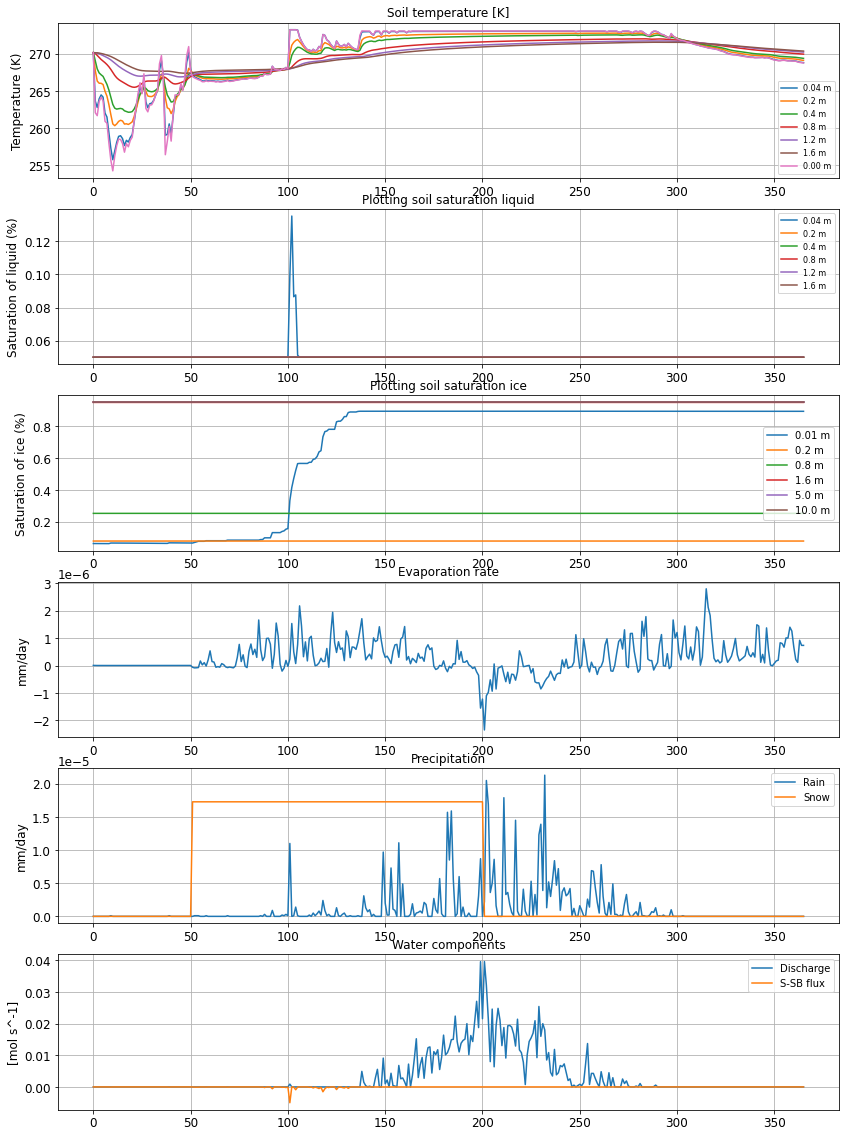

In [54]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Evaporation rate')
ax4.plot(df_observation['evaporation rate [m s^-1]']*86400/1000,label='Evaporation (mm/day)')
ax4.set_ylabel('mm/day')
ax4.grid(True)

ax5.set_title('Precipitation')
ax5.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax5.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax5.set_ylabel('mm/day')
ax5.legend()
ax5.grid(True)

ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

## Solutions

In [55]:
simset = modeled(directory)

## Plot solutions

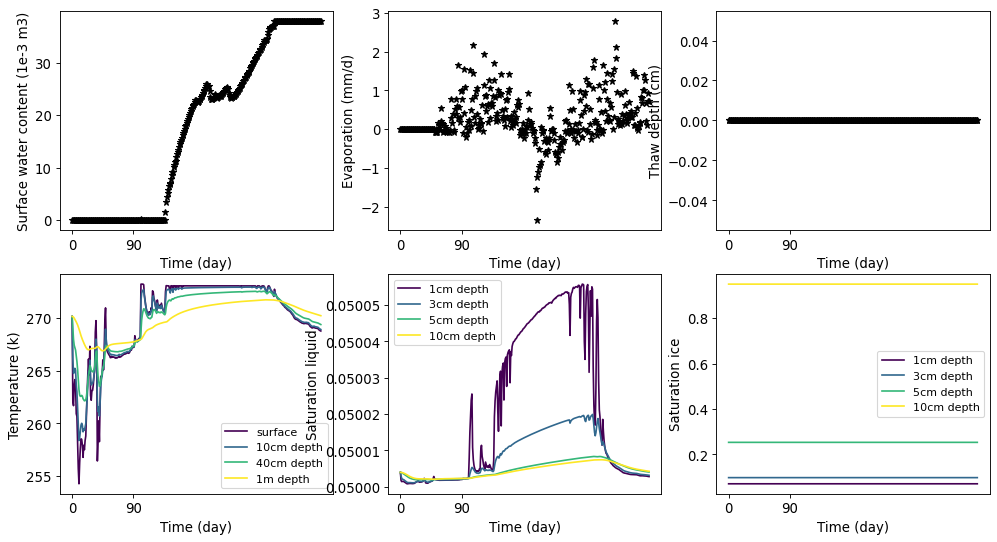

In [56]:
nrows, ncols = 2,3
figl, figw = 15,8
fig, axs = plt.subplots(nrows,ncols,figsize=(figl,figw),dpi=80)
keys = list(simset.keys())
for i in range(ncols):
    plot(simset,keys[i],axs[0][i],label=None)

labels = [['surface','10cm depth','40cm depth','1m depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth']]

for i in range(ncols):
    plot(simset,keys[i+3],axs[1][i],labels[i])

plt.subplots_adjust(wspace=0.2,hspace=0.2)

Text(0.5, 0, 'Days')

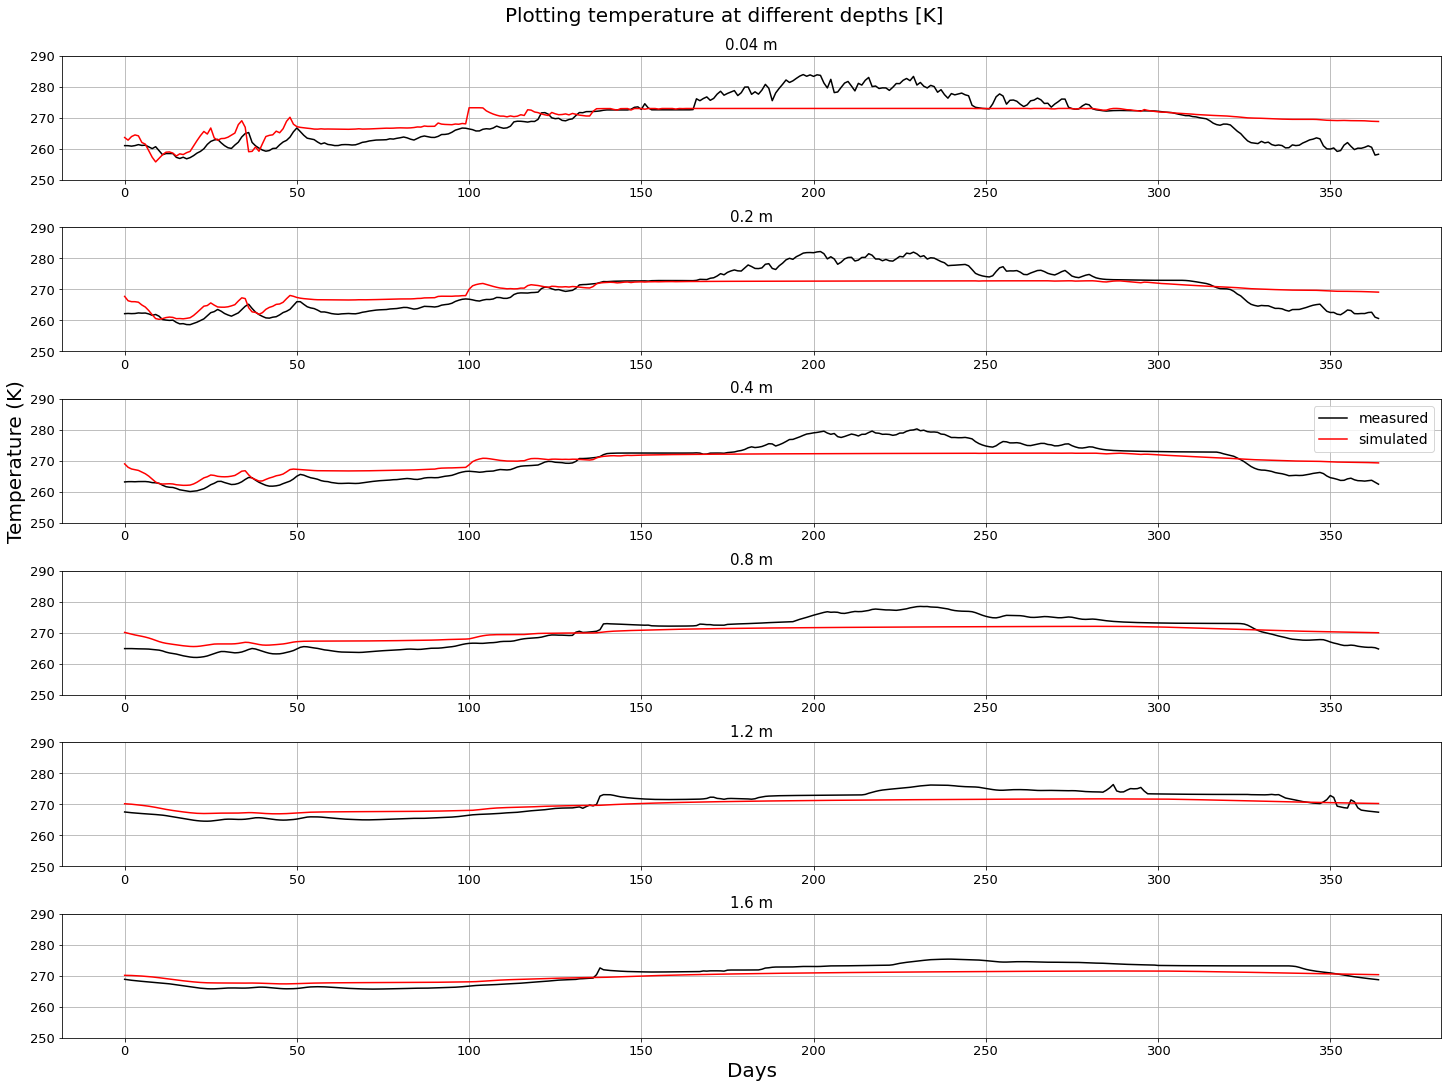

In [57]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
* Temperature estimates have improved on changing the top B.C as Temp. at 0.0 m


Text(0.5, 0, 'Days')

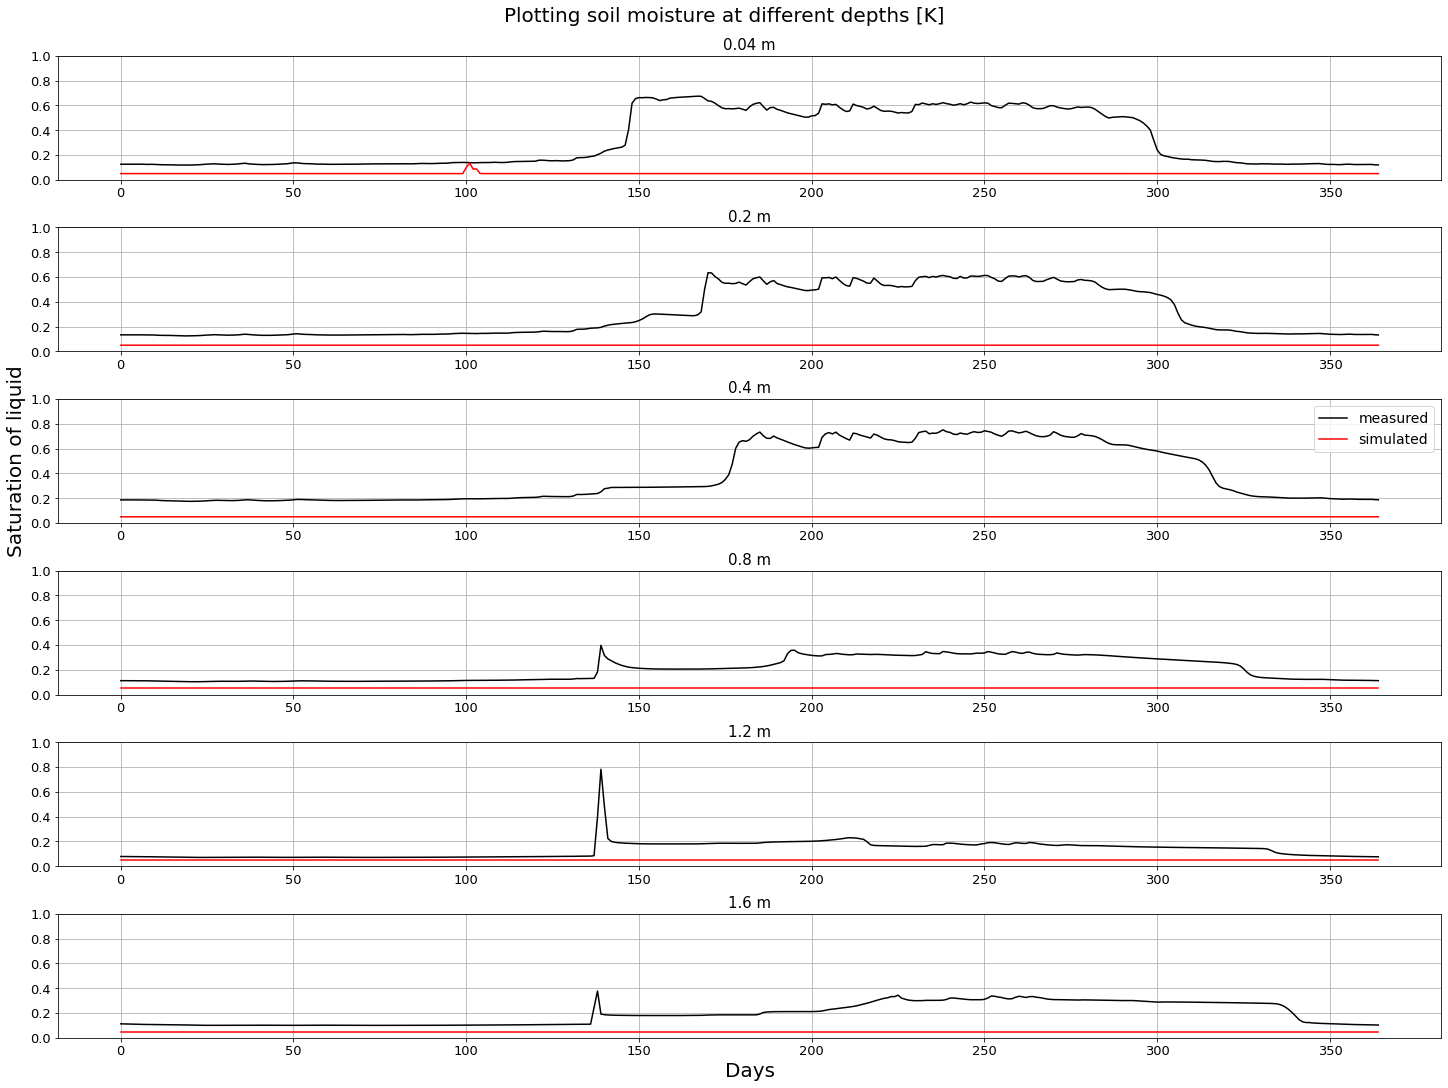

In [58]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Checking out the results : Case5_III3.demo

In [59]:
directory = 'Case5_III3.demo'

In [60]:
obs = pd.read_csv(f'{directory}/observation.dat',skiprows=274,sep=' ')
obs.index

RangeIndex(start=0, stop=366, step=1)

In [61]:
df_observation = obs.copy()

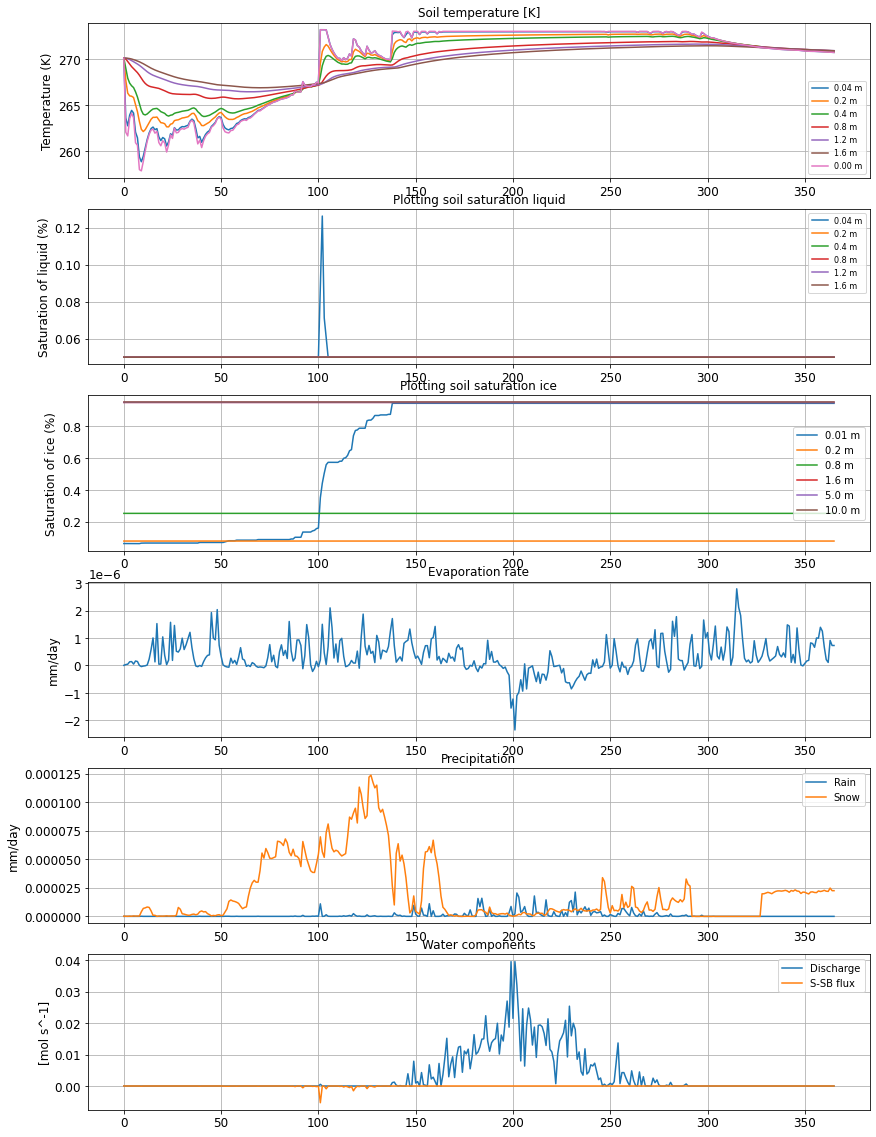

In [62]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Evaporation rate')
ax4.plot(df_observation['evaporation rate [m s^-1]']*86400/1000,label='Evaporation (mm/day)')
ax4.set_ylabel('mm/day')
ax4.grid(True)

ax5.set_title('Precipitation')
ax5.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax5.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax5.set_ylabel('mm/day')
ax5.legend()
ax5.grid(True)

ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

## Solutions

In [63]:
simset = modeled(directory)

## Plot solutions

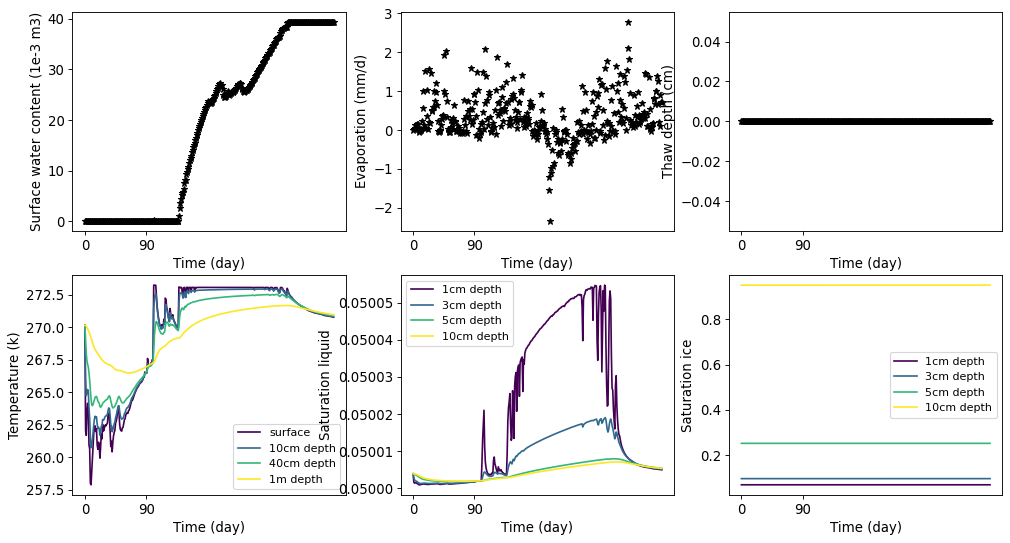

In [65]:
nrows, ncols = 2,3
figl, figw = 15,8
fig, axs = plt.subplots(nrows,ncols,figsize=(figl,figw),dpi=80)
keys = list(simset.keys())
for i in range(ncols):
    plot(simset,keys[i],axs[0][i],label=None)

labels = [['surface','10cm depth','40cm depth','1m depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth']]

for i in range(ncols):
    plot(simset,keys[i+3],axs[1][i],labels[i])

plt.subplots_adjust(wspace=0.2,hspace=0.2)

Text(0.5, 0, 'Days')

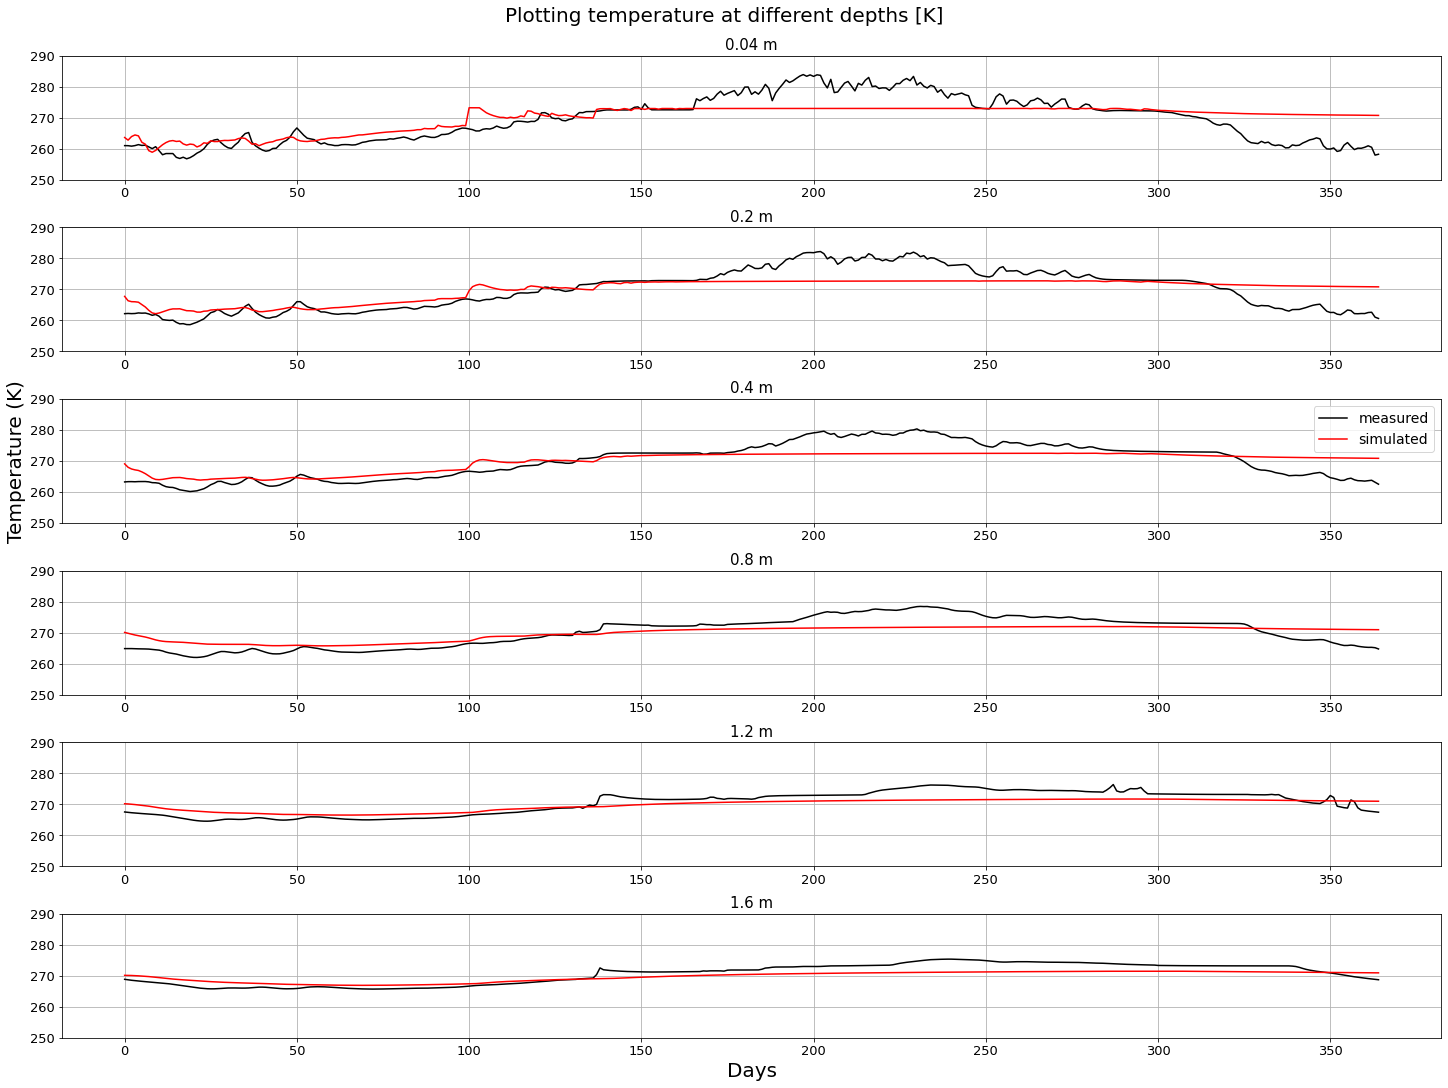

In [66]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
* Temperature estimates have improved on changing the top B.C as Temp. at 0.0 m


Text(0.5, 0, 'Days')

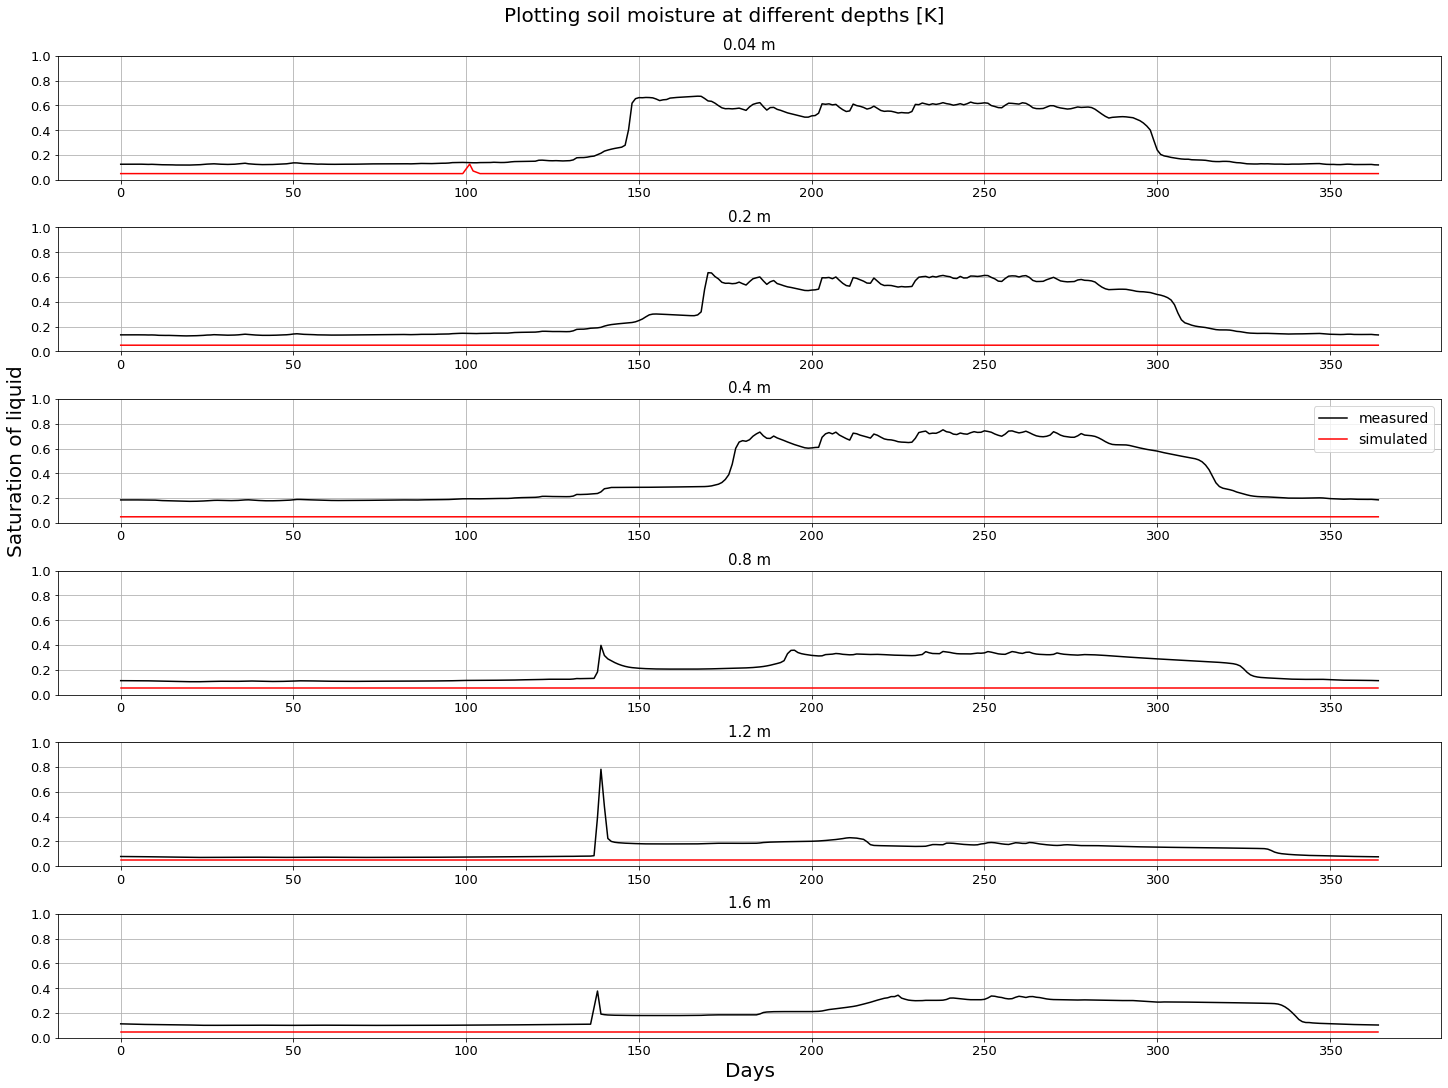

In [67]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Checking out the results : Case5_III_B.demo (With data - long wave radiation)

In [36]:
directory = 'Case5_III_B.demo'

In [37]:
obs = pd.read_csv(f'{directory}/observation.dat',skiprows=316,sep=' ')
obs.index

RangeIndex(start=0, stop=366, step=1)

In [38]:
df_observation = obs.copy()

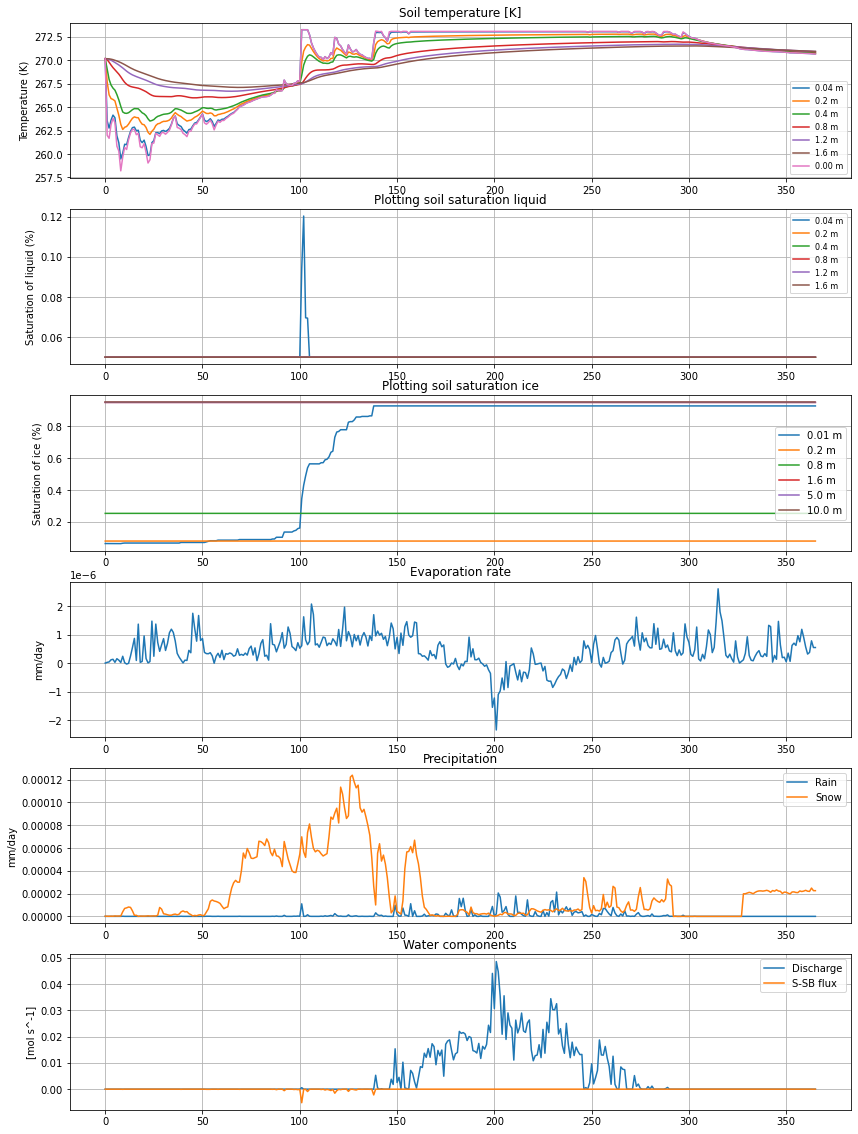

In [39]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax1.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Evaporation rate')
ax4.plot(df_observation['evaporation rate [m s^-1]']*86400/1000,label='Evaporation (mm/day)')
ax4.set_ylabel('mm/day')
ax4.grid(True)

ax5.set_title('Precipitation')
ax5.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax5.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax5.set_ylabel('mm/day')
ax5.legend()
ax5.grid(True)

ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

## Solutions

In [40]:
simset = modeled(directory)

## Plot solutions

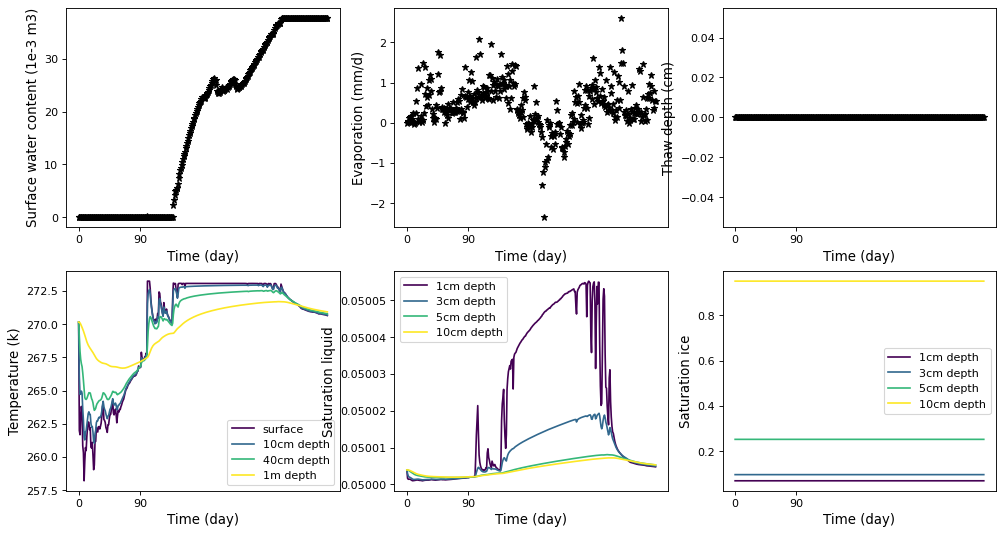

In [41]:
nrows, ncols = 2,3
figl, figw = 15,8
fig, axs = plt.subplots(nrows,ncols,figsize=(figl,figw),dpi=80)
keys = list(simset.keys())
for i in range(ncols):
    plot(simset,keys[i],axs[0][i],label=None)

labels = [['surface','10cm depth','40cm depth','1m depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth'],
          ['1cm depth','3cm depth','5cm depth','10cm depth']]

for i in range(ncols):
    plot(simset,keys[i+3],axs[1][i],labels[i])

plt.subplots_adjust(wspace=0.2,hspace=0.2)

Text(0.5, 0, 'Days')

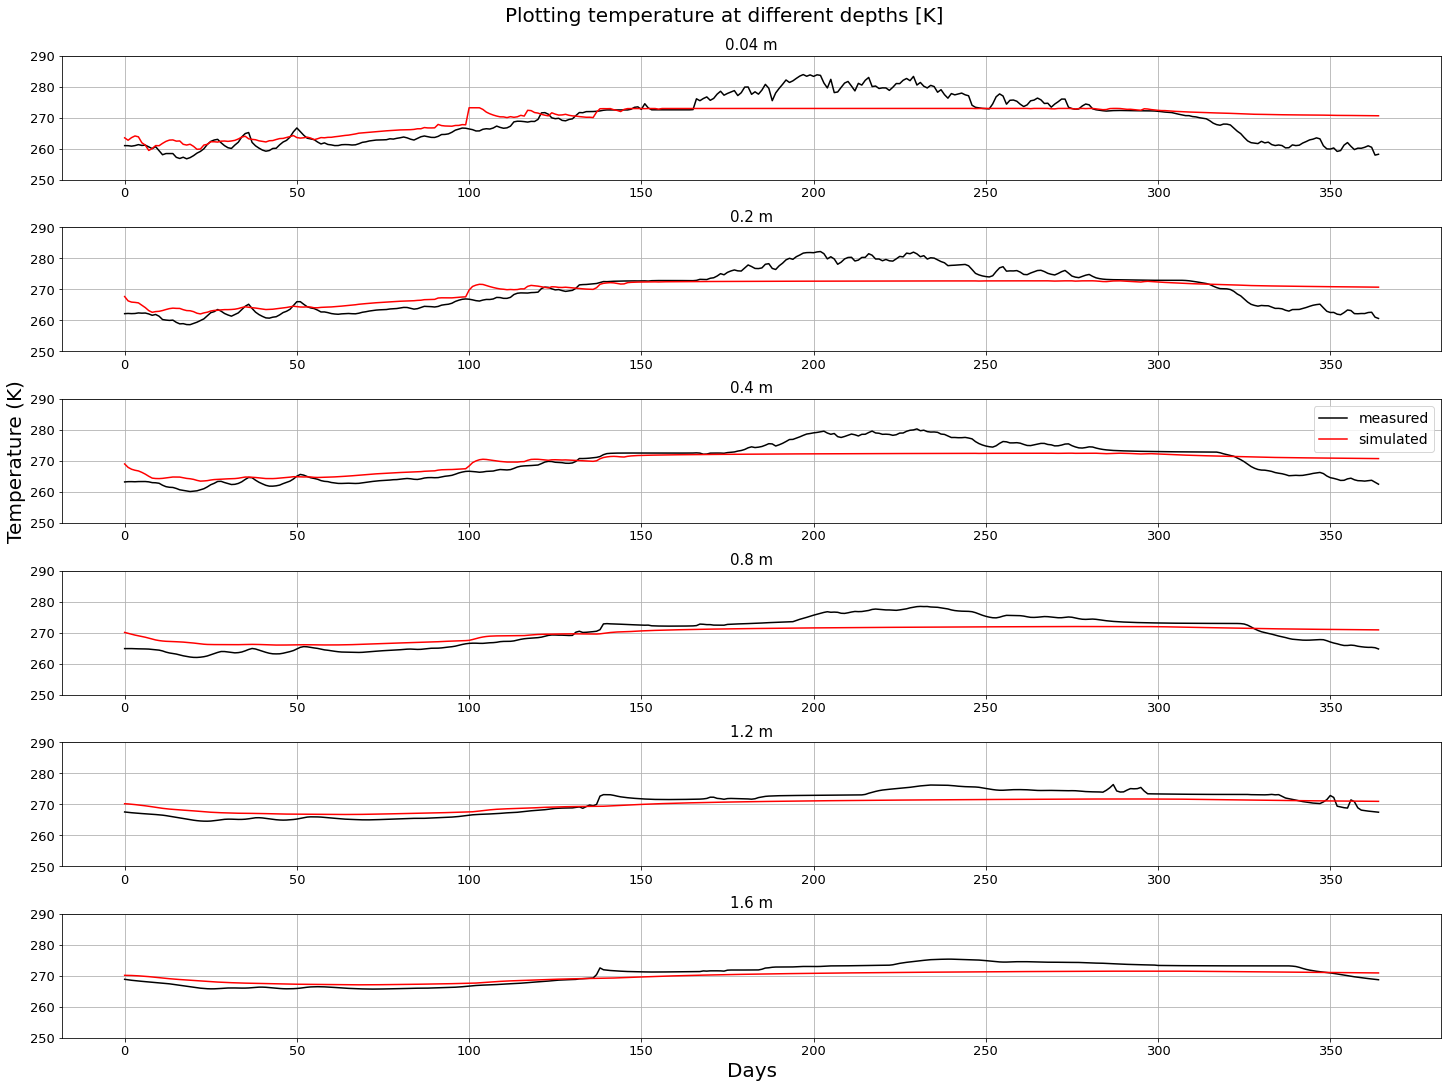

In [42]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'Soil temperature at - {depth} m (K)'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} temperature [K]'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,290)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
* Temperature estimates have improved on changing the top B.C as Temp. at 0.0 m


Text(0.5, 0, 'Days')

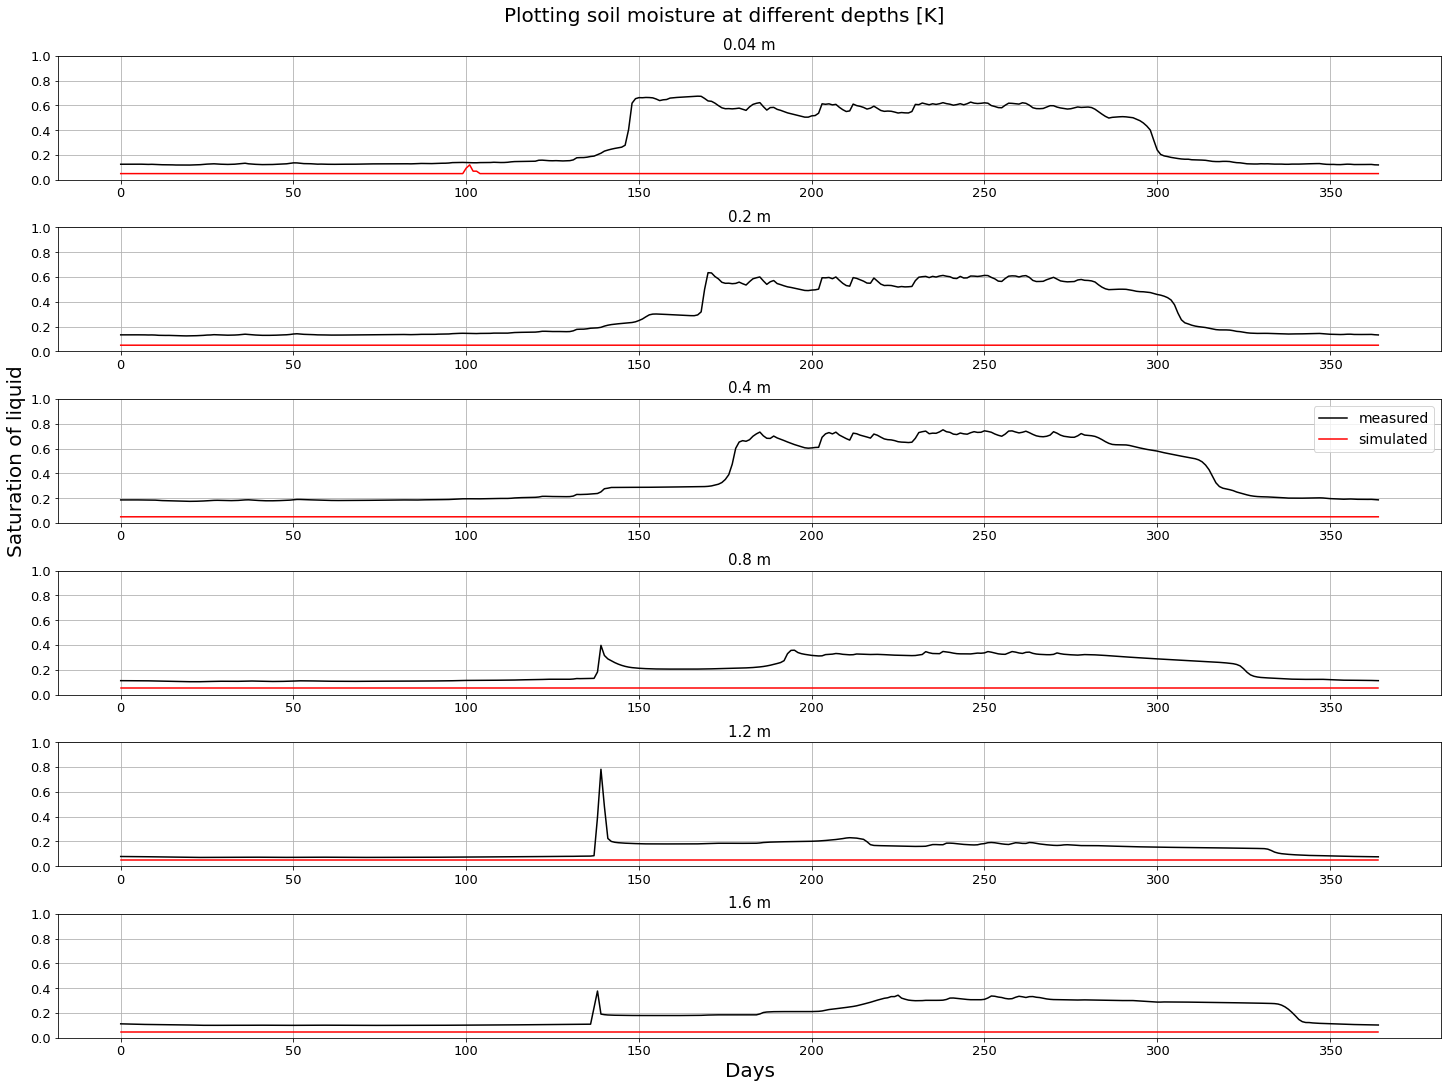

In [43]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K]', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)




for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, Yakou_measured_data[f'point -{depth} saturation liquid'].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, df_observation[f'point -{depth} saturation liquid'][1:].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,1)
    


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Plotting other parameters:

In [45]:
df_observation.columns

Index(['time [s]', 'water content [mol]', 'surface water content [mol]',
       'snow water equivalent [mol]', 'evaporation rate [m s^-1]',
       'discharge [mol s^-1]', 'surface-subsurface flux [mol s^-1]',
       'precipitation rain [m s^-1]', 'precipitation snow [m s^-1]',
       'snow melt [m s^-1]', 'thaw depth [m]', 'water table depth [m]',
       'surface temperature [K]', 'surface albedo [-]',
       'surface-qE_latent_heat', 'surface-qE_lw_out',
       'surface-qE_sensible_heat', 'surface-ponded_depth [m]',
       'surface-incoming_longwave_radiation',
       'surface-incoming_shortwave_radiation', 'point -0.01 temperature [K]',
       'point -0.04 temperature [K]', 'point -0.1 temperature [K]',
       'point -0.2 temperature [K]', 'point -0.4 temperature [K]',
       'point -0.8 temperature [K]', 'point -1.2 temperature [K]',
       'point -1.6 temperature [K]', 'point -5.0 temperature [K]',
       'point -10.0 temperature [K]', 'point -20.0 temperature [K]',
       'point -

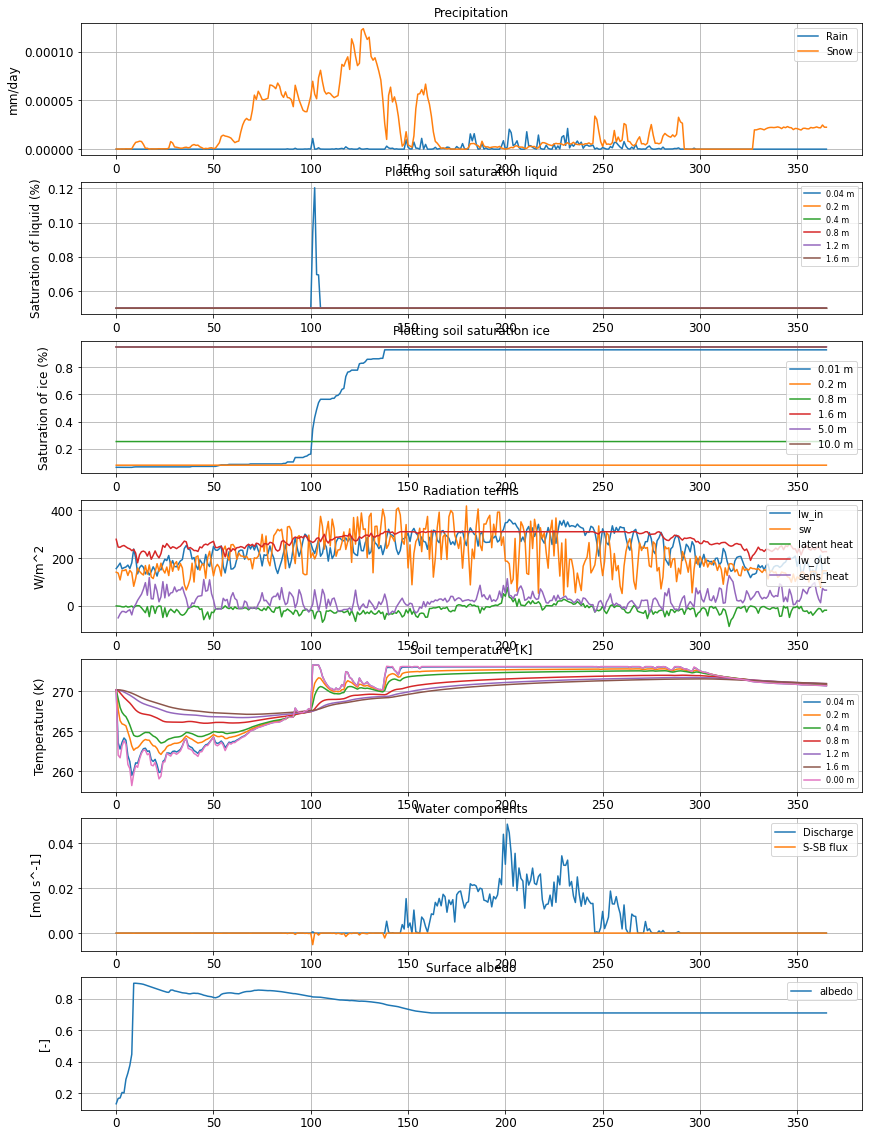

In [56]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1)
fig.set_size_inches(w=14,h=20)
#fig.suptitle('Plotting temperature, saturation of liquid and ice')

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, value in enumerate(depths):
    ax5.plot(df_observation[f'point -{value} temperature [K]'],label=f'{value} m')
    #ax1.plot(Yakou_measured_data[f'Soil temperature at - {value} m (K)'],label=f'{value} m - mes')
    
    ax2.plot(df_observation[f'point -{value} saturation liquid'],label=f'{value} m')
    #ax2.plot(Yakou_measured_data[f'point -{value} saturation liquid'],label=f'{value} m - mes')
    

ax1.set_title('Precipitation')
ax1.plot(df_observation['precipitation rain [m s^-1]']*86400/1000,label='Rain')
ax1.plot(df_observation['precipitation snow [m s^-1]']*86400/1000,label='Snow')
ax1.set_ylabel('mm/day')
ax1.legend()
ax1.grid(True)




ax2.set_title('Plotting soil saturation liquid')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Radiation terms')
ax4.plot(df_observation['surface-incoming_longwave_radiation'],label='lw_in')
ax4.plot(df_observation['surface-incoming_shortwave_radiation'],label='sw')
ax4.plot(df_observation['surface-qE_latent_heat'],label='latent heat')
ax4.plot(df_observation['surface-qE_lw_out'],label='lw_out')
ax4.plot(df_observation['surface-qE_sensible_heat'][1:],label='sens_heat')

#'surface-qE_latent_heat', 'surface-qE_lw_out',
#       'surface-qE_sensible_heat'
ax4.set_ylabel('W/m^2')
ax4.legend()
ax4.grid(True)

ax5.set_title('Soil temperature [K]')
#ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax5.plot(df_observation['surface temperature [K]'],label='0.00 m')

ax5.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax5.legend(fontsize=8)
ax5.grid(True)


ax6.set_title('Water components')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax6.plot(df_observation['discharge [mol s^-1]'],label='Discharge')
ax6.plot(df_observation['surface-subsurface flux [mol s^-1]'],label='S-SB flux')
ax6.set_ylabel('[mol s^-1]')
ax6.legend()
ax6.grid(True)

ax7.set_title('Surface albedo')
#ax6.plot(df_observation['water table depth [m]'],label='Water table depth')
#ax6.plot(df_observation['thaw depth [m]'],label='Thaw depth')
#ax7.plot(df_observation['water table depth [m]'],label='surface water table depth')
#ax7.plot(df_observation['thaw depth [m]'],label='Thaw depth')
ax7.plot(df_observation['surface albedo [-]'],label='albedo')
ax7.set_ylabel('[-]')
ax7.legend()
ax7.grid(True)